<p align="center">
  <img src="images\Hub_title.png" alt="[YOUR_IMAGE_ALT]">
</p>

## ***Business Understanding***

### *Overview*
Tourism is a thriving industry in Kenya, and travelers often face the challenge of choosing the right destinations for their trips. Our project aims to address this problem by creating a recommendation system that assists users in discovering personalized tourist destinations in the country.

### *Problem Statement*

Travelers often struggle to choose the most suitable tourist destinations for their trips. With an overwhelming number of options available, personalized recommendations are crucial. Our project aims to address this challenge by creating a recommendation system that suggests relevant destinations in Kenya based on user preferences and historical interactions.

#### *Stakeholders*
1. **Travelers**: They seek relevant recommendations based on their preferences, interests, and historical interactions.
2. **Tourism Agencies**: These organizations can enhance user experiences by providing tailored suggestions.
3. **Local Businesses**: Recommendations can drive footfall to local attractions, restaurants, and accommodations.

### *Objectives*:

- "Build a collaborative filtering model to recommend destinations."
- "Reduce cold-start problem by incorporating content-based features."
- "Model Recall score ≥ 80%"
- "Model Accuracy ≥ 80%"

### *Proposed Solution and Metrics of Success*
We propose building a hybrid recommendation system that combines collaborative filtering and content-based approaches. Success metrics include accuracy, recall and precision scores.

### *Challenges*

1. **Data Quality and Diversity**:
   - Presence of missing values, outliers, or inaccuracies.
   - Ensuring diverse and representative data across different types of destinations (e.g., cities, beaches, historical sites) is essential.

2. **Cold-Start Problem**:
   - New users with limited interaction history pose a challenge. How do we recommend destinations for them?
   - Balancing collaborative filtering (based on user behavior) with content-based filtering (based on destination features) is critical.

3. **Scalability and Real-Time Recommendations**:
   - As the user base grows, the system must handle increased computational demands.
   - Providing real-time recommendations during user interactions requires efficient algorithms.

4. **User Engagement and Interpretability**:
   - Recommendations should align with user interests to keep them engaged.
   - Ensuring transparency and interpretability of the recommendation process is important.

### *Conclusion*
Our project has significant implications for travelers, tourism agencies, and local businesses. By solving this problem, we contribute to enhancing travel experiences and promoting local economies.


## ***Data Understanding***

### *Data Sources and Relevance*
- The dataset was scraped using the **APIFY Tripadvisor Scraper**.
- It contains information about tourist destinations, including their names, categories, ratings, review counts, images, and other relevant features.
- The data's relevance lies in its ability to help us recommend destinations to travelers based on their preferences and historical interactions.

### *Dataset Overview*
- The dataset consists of **2567 entries** (rows).
- Key columns include:
  - **Name**: The name of the destination.
  - **Category**: The type of destination (e.g., city, beach, historical site).
  - **Rating**: The average user rating (ranging from 1.0 to 5.0).
  - **Number of Reviews**: The count of user reviews.
  - **Image**: URLs to images representing the destinations.
  - **Photo Count**: The number of photos associated with each destination.
  - **Price Range**: Information about the cost level (if available).
  - **Review Tags**: Descriptive tags associated with reviews.
  - **Photos**: Additional photo URLs.
  - **Price Level**: Indication of price range (if available).

### *Justification for Feature Inclusion*
- **Name**, **Category**, and **Rating**: Essential for personalized recommendations.
- **Number of Reviews**: Reflects popularity and user engagement.
- **Image** and **Photo Count**: Enhance user experience.
- **Price Range** and **Price Level**: Useful for budget-conscious travelers.
- **Review Tags**: Provides insights into user preferences.

### *Data Limitations*
- **Missing Values**: Some entries lack ratings, images, or price information.
- **Limited Price Data**: Only 1487 entries have price-related details.
- **Data Quality**: Ensure data quality and handle missing values appropriately.

## ***Data Preparation***

In [1]:
# Importing necessary libraries
import pandas as pd
import json
import glob
import re
import string





import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import ast
import requests
from PIL import Image
import io

import nltk
from nltk.util import bigrams
from collections import Counter
from wordcloud import WordCloud
import itertools


# !pip install textblob
from textblob import TextBlob
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans


from surprise import Dataset, Reader, KNNBasic, SVD, NMF, KNNWithMeans, SVDpp
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.prediction_algorithms.matrix_factorization import SVDpp
from surprise.model_selection import cross_validate


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import ndcg_score, average_precision_score, mean_squared_error, mean_absolute_error



from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from surprise import Dataset, Reader, KNNBasic, SVD, NMF, KNNWithMeans, SVDpp
from surprise.model_selection import train_test_split
from surprise import accuracy as sup_accuracy
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.prediction_algorithms.matrix_factorization import SVDpp
from surprise.model_selection import cross_validate

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


import warnings
# Ignore future deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set_style('darkgrid')


class DataCleaning:
    def __init__(self):
        pass

    def read_json_files(self, json_files, expected_columns):
    # Reads multiple JSON files and concatenates them into a single DataFrame
        dfs = []
        for file in json_files:
            with open(file, encoding='utf-8', errors='ignore') as f:
                json_data = json.load(f)
                df = pd.DataFrame([
                        {
                            col: item.get(col, np.nan) for col in expected_columns
                        }
                        for item in json_data                 
                
                    
                ])
                dfs.append(df)
                self.df = pd.concat(dfs, ignore_index=True)
                
        return self.df
    
   
    def drop_columns(self, columns, df):
        # Drops specified columns from the DataFrame
        self.df.drop(columns=columns, inplace=True)
        
    def missing_values_percentage(self, df):
        # Calculates the percentage of missing values in each column
        column_percentages = self.df.isnull().sum() / len(self.df) * 100
        columns_with_missing_values = column_percentages[column_percentages > 0]
        return columns_with_missing_values.sort_values(ascending=False) 
    
    def drop_above_threshold(self, threshold):
        # Drops columns with missing values percentage above the specified threshold
        column_percentages = self.missing_values_percentage(self.df)
        columns_with_missing_values = column_percentages[column_percentages > threshold]
        columns_to_drop = columns_with_missing_values.index.tolist()
        self.df.drop(columns=columns_to_drop, inplace=True)
        
    def split_price_range(self):
        # Splits the priceRange column into LowerPrice and UpperPrice columns
        self.df[['LowerPrice', 'UpperPrice']] = self.df['priceRange'].str.replace('KES', '').str.split(' - ', expand=True)
        self.df['LowerPrice'] = self.df['LowerPrice'].str.replace(',', '').astype(float)
        self.df['UpperPrice'] = self.df['UpperPrice'].str.replace(',', '').astype(float)

    def fill_missing_prices(self):
        # Fills missing values in LowerPrice and UpperPrice columns based on type (ATTRACTION or HOTEL)
        self.df.loc[self.df['type'] == 'ATTRACTION', 'LowerPrice'] = self.df.loc[self.df['type'] == 'ATTRACTION', 'LowerPrice'].fillna(self.df['LowerPrice'].min())
        self.df.loc[self.df['type'] == 'ATTRACTION', 'UpperPrice'] = self.df.loc[self.df['type'] == 'ATTRACTION', 'UpperPrice'].fillna(self.df['UpperPrice'].min())
        self.df.loc[self.df['type'] == 'HOTEL', 'LowerPrice'] = self.df.loc[self.df['type'] == 'HOTEL', 'LowerPrice'].fillna(self.df['LowerPrice'].mean())
        self.df.loc[self.df['type'] == 'HOTEL', 'UpperPrice'] = self.df.loc[self.df['type'] == 'HOTEL', 'UpperPrice'].fillna(self.df['UpperPrice'].mean())


    def clean_ratings(self):
        # Replaces missing values in the rating column with 0
        self.df['rating'].fillna(5, inplace=True)

    def clean_review_tags(self):
        # Cleans up the reviewTags column by extracting the text values
        self.df.loc[:, 'reviewTags'] = self.df['reviewTags'].apply(lambda entries: [{'text': entry['text']} for entry in entries] if isinstance(entries, list) else [])
        self.df.loc[:, 'reviewTags'] = self.df['reviewTags'].apply(lambda tags: [tag['text'] for tag in tags])


    def drop_missing_values(self, columns):
        # Drops rows with missing values in specified columns
        self.df = self.df.dropna(subset=columns)

    def drop_unused_columns(self, columns):
        # Drops unused columns from the DataFrame
        self.df = self.df.drop(columns=columns)

    def drop_rows_with_nan(self):
        # Drops rows with NaN values
        self.df = self.df.dropna()

    def save_to_csv(self, file_path):
        # Saves the DataFrame to a CSV file
        self.df.to_csv(file_path, index=False)





### ***Data Cleaning***

In [2]:
# Filter warnings
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')




class DataSourcing:
    def __init__(self):
        self.df = None

    def read_json_files(self, json_files, expected_columns):
    # Reads multiple JSON files and concatenates them into a single DataFrame
        dfs = []
        for file in json_files:
            with open(file, encoding='utf-8', errors='ignore') as f:
                json_data = json.load(f)
                df = pd.DataFrame([
                        {
                            col: item.get(col, np.nan) for col in expected_columns
                        }
                        for item in json_data                 
                
                    
                ])
                dfs.append(df)
                self.df = pd.concat(dfs, ignore_index=True)
                
        return self.df
    
    def dataframe_details(self,df):
        """
        Print details of the dataframe.
        Parameters:
        df (DataFrame): The dataframe to be analyzed.
        Returns:
        None
        """
        print("============================")
        print(f"DATAFRAME SHAPE: {df.shape}")
        print("============================\n\n")
        print("================")
        print(f"DATAFRAME HEAD:")
        print("================")
        print(f"{df.head()}")
        print("========================================================================\n\n")
        print("=======================")
        print(f"DATAFRAME COLUMNS INFO:")
        print("=======================")
        print(f"{df.info()}")
        print("========================================================================\n\n")
        print("==========================")
        print(f"DATAFRAME KEY STATISTICS:")
        print("==========================")
        print(f"{df.describe().transpose()}")
        print("========================================================================\n\n")

    

***DataFrame info***

In [3]:
ds = DataSourcing()

files = [
        "data\kenya.json", "data\Tripadvisor1.json",
        "data\Tripadvisor2.json", "data\Tripadvisor3.json", "data\Tripadvisor4.json"
        ]
expected_columns = [
        "name", "category", "rating", "numberOfReviews",
        "image", "photoCount", "priceRange", "reviewTags",
        "priceLevel", "locationString"
                    ]

data = ds.read_json_files(files, expected_columns)

In [4]:
ds.dataframe_details(data)

DATAFRAME SHAPE: (5544, 10)


DATAFRAME HEAD:
                                      name    category  rating  \
0                         Observation Hill  attraction     4.5   
1             Mount Longonot National Park  attraction     4.5   
2  Karen Blixen Coffee Garden and Cottages  attraction     4.5   
3                           Kiambethu Farm  attraction     5.0   
4                        Fort Jesus Museum  attraction     4.0   

   numberOfReviews                                              image  \
0              782  https://media-cdn.tripadvisor.com/media/photo-...   
1              208  https://media-cdn.tripadvisor.com/media/photo-...   
2              591  https://media-cdn.tripadvisor.com/media/photo-...   
3              226  https://media-cdn.tripadvisor.com/media/photo-...   
4              978  https://media-cdn.tripadvisor.com/media/photo-...   

   photoCount priceRange                                         reviewTags  \
0         423        NaN  [{'text': 'gr

In [5]:
# Instantiate the DataCleaning class
data_cleaner = DataCleaning()

# Assign your existing data DataFrame to the class's df attribute
data_cleaner.df = data

# Apply the missing_values_percentage method
missing_values = data_cleaner.missing_values_percentage(data_cleaner.df)

# Print the results
missing_values


locationString    55.735931
priceRange        51.064214
priceLevel        51.064214
rating             0.072150
image              0.054113
dtype: float64

***Check for Duplicates***

In [6]:
# Convert list columns to strings to avoid unhashable type errors
data['reviewTags'] = data['reviewTags'].apply(lambda x: str(x) if isinstance(x, list) else x)
# data['photos'] = data['photos'].apply(lambda x: str(x) if isinstance(x, list) else x)

# Check for duplicates
duplicates = data.duplicated()

# Display duplicates
print("Duplicate Rows:")
duplicates.value_counts()

Duplicate Rows:


False    4760
True      784
Name: count, dtype: int64

*Drop Duplicates*

In [7]:
# Drop the duplicate rows
data = data.drop_duplicates()
data.drop_duplicates(subset=['name'], inplace=True)
# Display the cleaned data
print('Cleaned Data Shape:')
print(data.shape)
print('='*45)
print(data.info())

Cleaned Data Shape:
(1962, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 1962 entries, 0 to 4543
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1962 non-null   object 
 1   category         1962 non-null   object 
 2   rating           1959 non-null   float64
 3   numberOfReviews  1962 non-null   int64  
 4   image            1959 non-null   object 
 5   photoCount       1962 non-null   int64  
 6   priceRange       1066 non-null   object 
 7   reviewTags       1962 non-null   object 
 8   priceLevel       1066 non-null   object 
 9   locationString   1445 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 168.6+ KB
None


### ***Feature Engineering***

In [8]:
class DataPreprocessing(DataSourcing):
    def __init__(self):
        super().__init__()
        """Data Preprocessing class that inherits from the data sourcing class.
        Contains functions to be used to check certain aspects in the data for cleaning.
        Checks for duplicates, nulls and outliers
        """
      

    def check_duplicates(self, data):
        duplicates = data[data.duplicated()].shape[0]
        print("There are {} duplicates in the data.".format(duplicates))
        
    def check_null_values(self, data):
        null_values = data.isnull().sum()
        print(null_values)
        print("====================================")
        print("List of columns with missing values:")
        print("====================================")
        return null_values[null_values > 0].index.tolist()



In [9]:
# Initialize the data preprocessing class
dp = DataPreprocessing()
data.columns

Index(['name', 'category', 'rating', 'numberOfReviews', 'image', 'photoCount',
       'priceRange', 'reviewTags', 'priceLevel', 'locationString'],
      dtype='object')

***1. Extract `reviews` and `texts` from `reviewTags`***

In [10]:
# Convert the string representations of lists of dictionaries to actual lists of dictionaries
data['reviewTags'] = data['reviewTags'].apply(ast.literal_eval)

# Extract texts and reviews from the reviewTags column
data['texts'] = data['reviewTags'].apply(lambda x: [d['text'] for d in x])
data['reviews'] = data['reviewTags'].apply(lambda x: [d['reviews'] for d in x])

# Display the updated DataFrame
data.head(2)

name    category  rating  numberOfReviews  \
0              Observation Hill  attraction     4.5              782   
1  Mount Longonot National Park  attraction     4.5              208   

                                               image  photoCount priceRange  \
0  https://media-cdn.tripadvisor.com/media/photo-...         423        NaN   
1  https://media-cdn.tripadvisor.com/media/photo-...         441        NaN   

                                          reviewTags priceLevel  \
0  [{'text': 'great view', 'reviews': 55}, {'text...        NaN   
1  [{'text': 'crater rim', 'reviews': 18}, {'text...        NaN   

                                      locationString  \
0  Amboseli National Park, Amboseli Eco-system, R...   
1                   Maai Mahiu, Rift Valley Province   

                                               texts  \
0  [great view, vantage point, entire park, short...   
1  [crater rim, day trip, start early, amazing vi...   

                                             reviews  
0  [55, 17, 16, 15, 11, 8, 89, 141, 137, 81, 98, ...  
1  [18, 14, 10, 8, 5, 4, 4, 3, 3, 3, 2, 2, 2, 2, ...

***2. Decode the `priceLevel` column***

In [11]:
data['priceLevel'].value_counts()

priceLevel
$       443
$$      292
$$$$    213
$$$     118
Name: count, dtype: int64

*Map the `$` into their corresponding categories*

1. **Luxury**: The most expensive category, offering premium services and facilities.

2. **Premium**: Mid-range in price, providing high-quality services and accommodations.

3. **Standard**: Affordable options with good services and facilities.

4. **Budget**: The most economical choice, offering basic services and accommodations.

In [12]:
# Mapping function
def map_dollar_signs(dollar_signs):
    mapping = {
        "$$$$": "Luxury",
        "$$$": "Premium",
        "$$": "Standard",
        "$": "Budget"
    }
    return mapping.get(dollar_signs, "Unknown")

# Create new column 'priceLevel'
data['priceLevel'] = data['priceLevel'].apply(map_dollar_signs)

# Display the DataFrame
data['priceLevel'].value_counts()

priceLevel
Unknown     896
Budget      443
Standard    292
Luxury      213
Premium     118
Name: count, dtype: int64

***3. Create new price columns (`upperPrice` & `lowerPrice`)***

In [13]:
def split_price_range(data, conversion_rate=145.0):
    # Extract unique values from the priceRange column
    unique_price_ranges = data['priceRange'].nunique()

    # Print the number of unique values (optional)
    print(f"Number of unique price ranges: {unique_price_ranges}")

    # Convert USD prices to KES and extract lowerPrice and upperPrice
    def convert_and_extract(x):
        if isinstance(x, str):
            if '$' in x:
                lower_price = float(x.split(' - ')[0].replace('$', '').replace(',', '')) * conversion_rate
                upper_price = float(x.split(' - ')[-1].replace('$', '').replace(',', '')) * conversion_rate
            elif 'KES' in x:
                lower_price = float(x.split(' - ')[0].replace('KES', '').replace(',', ''))
                upper_price = float(x.split(' - ')[-1].replace('KES', '').replace(',', ''))
            return lower_price, upper_price
        return np.nan, np.nan

    data[['lowerPrice', 'upperPrice']] = data['priceRange'].apply(
        lambda x: pd.Series(convert_and_extract(x))
    )

    # Fill missing values with NaN
    data['lowerPrice'] = data['lowerPrice'].fillna(np.nan)
    data['upperPrice'] = data['upperPrice'].fillna(np.nan)

    return data[['lowerPrice', 'upperPrice']].tail()


In [14]:
split_price_range(data)


Number of unique price ranges: 1025


lowerPrice  upperPrice
4539         NaN         NaN
4540      3374.0      3374.0
4541         NaN         NaN
4542      7008.0      9603.0
4543      2206.0      3763.0

In [15]:
data[['upperPrice', 'lowerPrice']].nunique()

upperPrice    564
lowerPrice    511
dtype: int64

In [16]:
data[['upperPrice', 'lowerPrice']].value_counts().head()

upperPrice  lowerPrice
28129.0     28129.0       3
15190.0     11392.0       3
4282.0      3893.0        2
5191.0      4672.0        2
10549.0     7736.0        2
Name: count, dtype: int64

***4. Create new column (`averagePrice`)***

In [17]:
data['averagePrice'] = (data['lowerPrice'] + data['upperPrice']) / 2

In [18]:
data['averagePrice'].value_counts().head()

averagePrice
4782.0     6
9564.0     5
28129.0    4
9142.5     4
9845.0     4
Name: count, dtype: int64

***5. Create new column (`weighted_sentiment`) for Sentiment Analysis of Reviews***

##### *STEPS*

    Step 1: Perform Sentiment Analysis

    - We will use TextBlob to calculate the sentiment polarity. (Polarity is a float within the range [-1.0, 1.0], where -1.0 represents a negative sentiment and 1.0 represents a positive sentiment.)

    Step 2: Weight the Sentiment Scores

    Step 3: Aggregate the Weighted Scores

  

We will create an additional column, `weighted_sentiment`, that represents the weighted average sentiment score for each place. This column can be used to make recommendations based on the overall sentiment of reviews.

In [19]:
# Perform sentiment analysis and calculate weighted sentiment scores
def calculate_weighted_sentiment(texts, reviews):
    sentiments = [TextBlob(text).sentiment.polarity for text in texts]
    weighted_sentiments = [sentiment * review for sentiment, review in zip(sentiments, reviews)]
    total_reviews = sum(reviews)
    weighted_average_sentiment = sum(weighted_sentiments) / total_reviews if total_reviews > 0 else 0
    return weighted_average_sentiment

# The statistical method below helps in balancing the sentiment score with the number of reviews, preventing
# entities with few reviews from ranking disproportionately high or low.
def bayesian_average(sentiment, num_reviews, C=10, m=0.03):
    """
    sentiment: Weighted sentiment score
    num_reviews: Number of reviews
    C: Weight parameter (the number of reviews we deem sufficient for confidence)
    m: Prior mean sentiment (average sentiment across all entities)
    """
    return (C * m + sentiment * num_reviews) / (C + num_reviews)

data['weighted_sentiment'] = data.apply(lambda row: calculate_weighted_sentiment(row['texts'], row['reviews']), axis=1)

data['adjusted_sentiment'] = data.apply(
    lambda row: bayesian_average(
        row['weighted_sentiment'], 
        row['numberOfReviews'], 
        C=10, 
        m=data['weighted_sentiment'].mean()
    ), 
    axis=1
)


# Display the updated DataFrame
review_data = data[['name','texts','reviews', 'numberOfReviews', 'weighted_sentiment', 'adjusted_sentiment']]

review_data.head()

name  \
0                         Observation Hill   
1             Mount Longonot National Park   
2  Karen Blixen Coffee Garden and Cottages   
3                           Kiambethu Farm   
4                        Fort Jesus Museum   

                                               texts  \
0  [great view, vantage point, entire park, short...   
1  [crater rim, day trip, start early, amazing vi...   
2                  [movie, africa, giraffes, safari]   
3  [indigenous forest, tea plantation, delicious ...   
4  [old town, interesting history, slave trade, t...   

                                             reviews  numberOfReviews  \
0  [55, 17, 16, 15, 11, 8, 89, 141, 137, 81, 98, ...              782   
1  [18, 14, 10, 8, 5, 4, 4, 3, 3, 3, 2, 2, 2, 2, ...              208   
2                                   [42, 94, 10, 14]              591   
3  [22, 27, 16, 14, 6, 6, 5, 4, 4, 3, 3, 5, 64, 2...              226   
4  [132, 17, 17, 46, 28, 9, 14, 14, 121, 28, 36, ...              978   

   weighted_sentiment  adjusted_sentiment  
0            0.039423            0.039152  
1            0.038617            0.037670  
2            0.000000            0.000299  
3            0.050552            0.049171  
4            0.047081            0.046786

In [20]:
data['reviews'].info()

<class 'pandas.core.series.Series'>
Index: 1962 entries, 0 to 4543
Series name: reviews
Non-Null Count  Dtype 
--------------  ----- 
1962 non-null   object
dtypes: object(1)
memory usage: 30.7+ KB


***5. Extract the `location` & `province` from `locationString`***

In [21]:
# Replace empty strings or null-like values with np.nan
data['locationString'] = data['locationString'].apply(lambda x: np.nan if pd.isnull(x) or x.strip() == '' else x)

# Fill remaining null values with a placeholder (e.g., "Unknown, Unknown")
# data['locationString'] = data['locationString'].fillna('Unknown, Unknown')

# Extract the location (before the first comma)
data['location'] = data['locationString'].str.split(',', n=1).str[0].str.strip()

# Extract the province (after the last comma)
data['province'] = data['locationString'].str.split(',').str[-1].str.strip()

# Display the DataFrame with the new columns
print(data[['location', 'province']].head())


                 location              province
0  Amboseli National Park  Rift Valley Province
1              Maai Mahiu  Rift Valley Province
2                 Nairobi               Nairobi
3                  Limuru      Central Province
4                 Mombasa        Coast Province


***6. Create a new value `tour operator` in the `category column`***

There are tour operators categorized as attractions. Let's separate them into their own category for better classification.

In [22]:
# # Keywords to search for
# keywords = ['safari', 'safaris', 'tour', 'tours', 'adventure', 'adventures']

# # Function to update category only if name contains keywords
# def update_category(row):
#     name, current_category = row
#     if any(keyword in name.lower() for keyword in keywords):
#         return 'tour operator'
#     return current_category

# # Apply the function to update the 'category' column
# data['category'] = data[['name', 'category']].apply(update_category, axis=1)

# Keywords to search for
keywords = ['safari', 'safaris', 'tour', 'tours', 'adventure',
            'adventures', 'expeditions', 'expedition', 'travels',
            'travel', 'travellers', 'escursioni']
hotel_keywords = ['cottages', 'spa', 'lodge', 'camp', 'club', 'hotel', 'resort']

# Function to update category with priority for hotel-related words
def update_category(row):
    name, current_category = row
    name_lower = name.lower()

    # Check for hotel-related keywords first
    if any(hotel_keyword in name_lower for hotel_keyword in hotel_keywords):
        return 'hotel'
    
    # Check for other keywords
    if any(keyword in name_lower for keyword in keywords):
        return 'tour operator'
    
    return current_category

# Apply the function to update the 'category' column
data['category'] = data[['name', 'category']].apply(update_category, axis=1)

# Display the updated DataFrame
data['category'].value_counts()

category
hotel            1404
tour operator     391
attraction        167
Name: count, dtype: int64

## ***EDA***

***Visual of the Destinations***

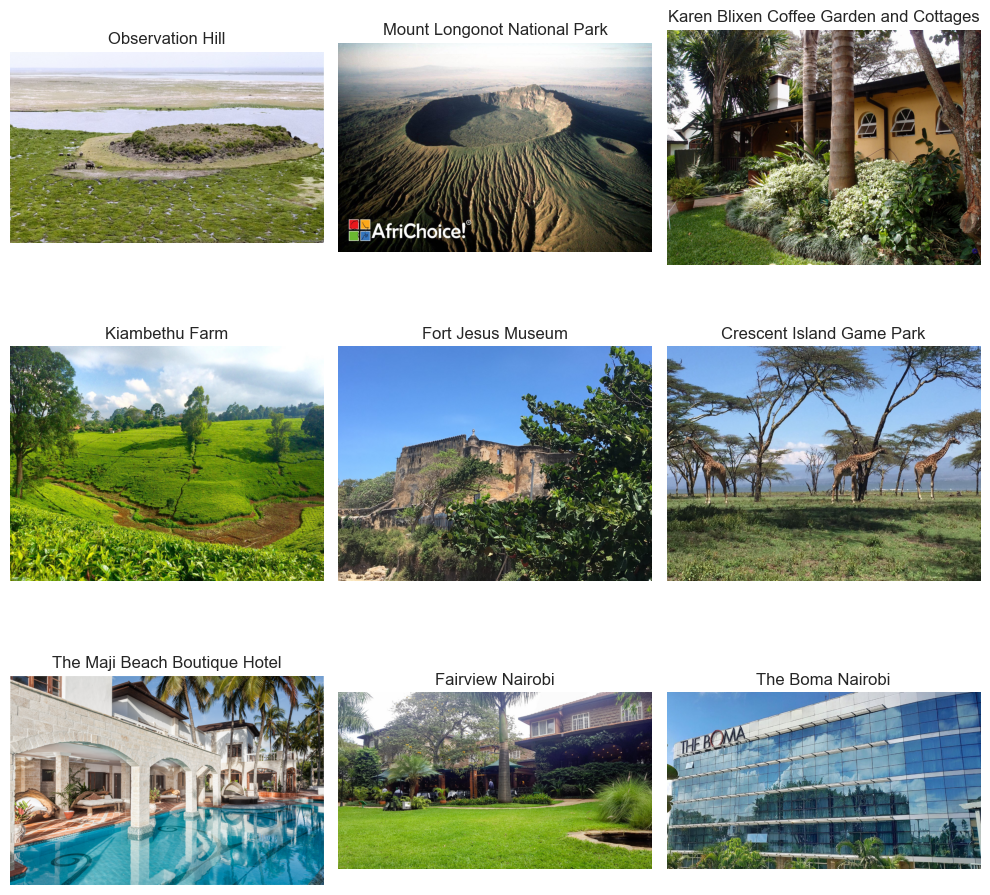

In [23]:
# Extract image URLs
# Load the first 9 images
image_urls = data['image'].tolist()
images = []

# Download images from URLs
for url in image_urls[0:9]:
    try:
        response = requests.get(url)
        if response.status_code == 200:
            img = Image.open(io.BytesIO(response.content))
            images.append(img)
        else:
            images.append(None)  # Append None if the image couldn't be retrieved
    except Exception as e:
        print(f"Error fetching image from {url}: {e}")
        images.append(None)

# Create a 3x3 grid of images
num_rows, num_cols = 3, 3
image_matrix = [[None for _ in range(num_cols)] for _ in range(num_rows)]

for idx, img in enumerate(images):
    row, col = divmod(idx, num_cols)
    if row < num_rows:
        image_matrix[row][col] = img

# Plot the images with labels
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
for i in range(num_rows):
    for j in range(num_cols):
        if image_matrix[i][j] is not None:
            axs[i, j].imshow(image_matrix[i][j])
            axs[i, j].set_title(data.loc[i * num_cols + j, 'name'])
        axs[i, j].axis('off')  # Hide axes

plt.tight_layout()
plt.show()

***Review Bigrams Visual***

A visualization of the most common bigrams in the reviews, weighted by the number of reviews, can be useful for the tour recommendation system to find the most popular words used in the reviews.

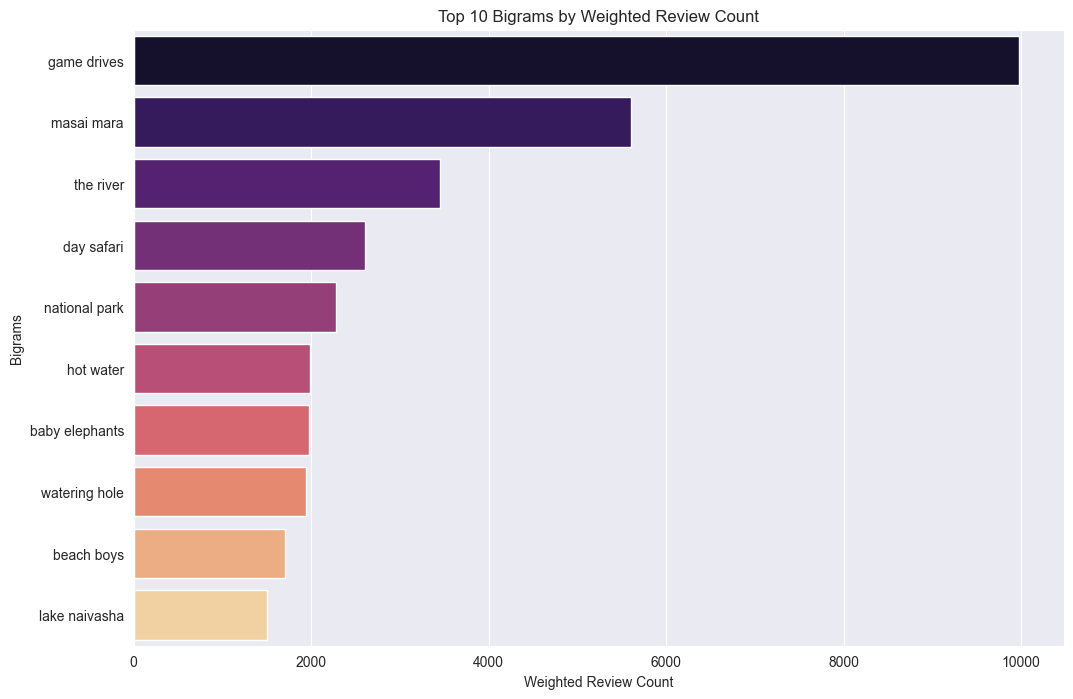

In [24]:
# Tokenize texts into bigrams and count frequencies
def get_bigrams(texts, reviews):
    bigram_counts = Counter()
    for text, review in zip(texts, reviews):
        tokens = nltk.word_tokenize(text)
        bigrams_list = list(bigrams(tokens))
        for bigram in bigrams_list:
            bigram_counts[bigram] += review
    return bigram_counts

data['bigram_counts'] = data.apply(lambda row: get_bigrams(row['texts'], row['reviews']), axis=1)

# Flatten the bigrams into a single string for vectorization
def flatten_bigrams(bigram_counts):
    flattened_text = []
    for bigram, count in bigram_counts.items():
        flattened_text.extend([' '.join(bigram)] * count)
    return ' '.join(flattened_text)

data['flattened_bigrams'] = data['bigram_counts'].apply(flatten_bigrams)

# Aggregate bigram counts across all rows
total_bigram_counts = Counter()
for counts in data['bigram_counts']:
    total_bigram_counts.update(counts)

# Get the most common bigrams
most_common_bigrams = total_bigram_counts.most_common(10)
bigram_labels, bigram_values = zip(*most_common_bigrams)

# Convert tuples to strings for labels
bigram_labels = [' '.join(bigram) for bigram in bigram_labels]

# Create DataFrame for plotting
plot_data = pd.DataFrame({'Bigram': bigram_labels, 'Count': bigram_values})

# Visualize the word counts
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Bigram', data=plot_data, palette='magma')
plt.xlabel('Weighted Review Count')
plt.ylabel('Bigrams')
plt.title('Top 10 Bigrams by Weighted Review Count')
plt.show()

*Extract the main bigram that describes the destinations*

In [25]:
# Function to extract the bigram with the highest frequency
def extract_main_bigram(counter):
    if not counter:  # Check if the Counter is empty
        return None
    return max(counter, key=counter.get)

# Apply the function to create the new column
data['main_bigram'] = data['bigram_counts'].apply(extract_main_bigram)

In [26]:
# Limit the bigram counts further
top_n = 50  # Further reduce the number of bigrams
limited_bigram_frequencies = dict(total_bigram_counts.most_common(top_n))
print(f"Number of bigrams: {len(limited_bigram_frequencies)}")
print(f"Memory usage: {sum([len(str(k)) + len(str(v)) for k, v in limited_bigram_frequencies.items()]) / (1024 * 1024):.2f} MB")
import gc

# Clear variables
del total_bigram_counts
gc.collect()


Number of bigrams: 50
Memory usage: 0.00 MB


171

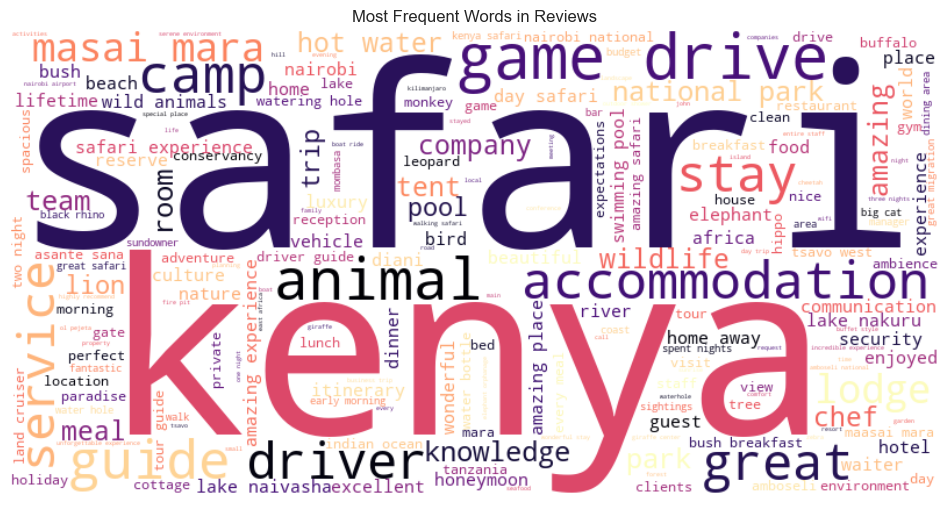

20 most common words:
safari: 846
the: 485
experience: 477
kenya: 473
game: 432
amazing: 385
guide: 379
mara: 354
animals: 349
great: 341
drives: 301
driver: 299
camp: 292
stay: 285
water: 266
place: 241
park: 237
trip: 233
pool: 226
masai: 223


In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

# Assuming 'data' is your DataFrame and 'texts' is the column containing the text data

# Combine all texts into a single string
combined_texts = ' '.join(' '.join(texts) for texts in data['texts'])

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(combined_texts)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews')
plt.show()

# Function to preprocess text
def preprocess(text):
    # Convert to lowercase and split into words
    words = text.lower().split()
    # Remove non-alphabetic characters and words with less than 3 characters
    words = [word for word in words if word.isalpha() and len(word) > 2]
    return words

# Preprocess and count words
words = preprocess(combined_texts)
word_counts = Counter(words)

# Print the 20 most common words
print("20 most common words:")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")

#### Summary of Key Themes

- **Safari and Wildlife:** The dominant theme is wildlife experiences, highlighted by terms like "safari," "wildlife," "animals," "game drive," and specific animals such as lion, elephant, and giraffe. This suggests a strong emphasis on safari and wildlife activities.

- **Accommodation and Service:** Key terms include "lodge," "camp," "hotel," "service," and "staff," reflecting a focus on guest accommodation and overall service quality.

- **Location:** Geographic terms such as "Masai Mara," "Lake Naivasha," "Kenya," and "Nairobi" underscore the regional focus of the reviews.

- **Positive Sentiment:** Words like "amazing," "great," "beautiful," and "wonderful" point to an overall positive sentiment towards the reviewed experiences.


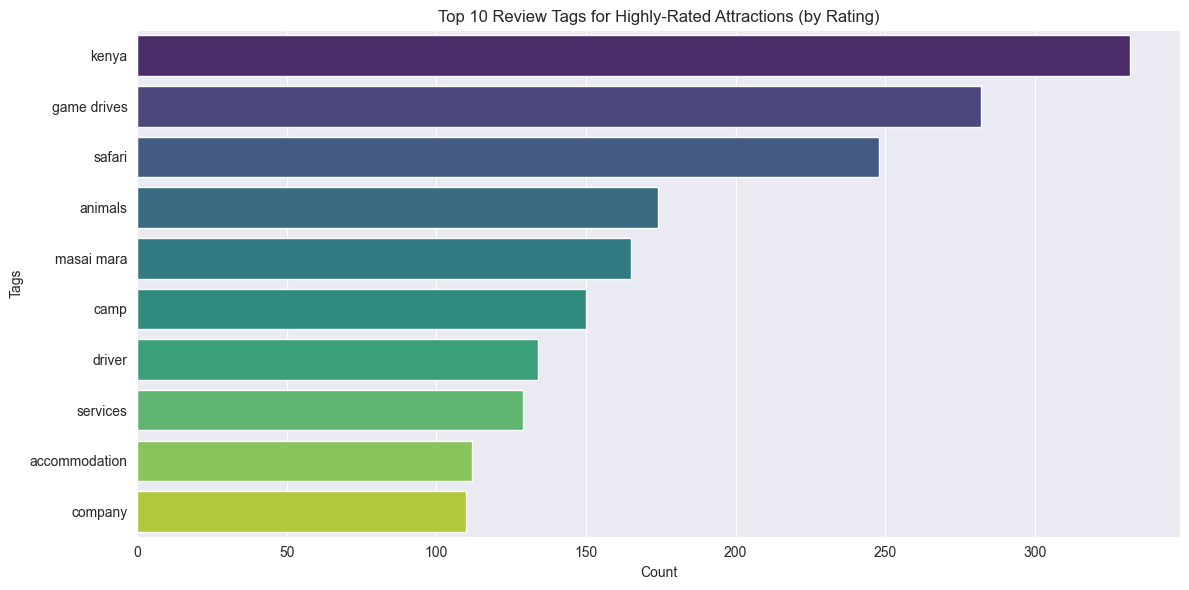

Top 10 tags for highly-rated attractions:
kenya: 332
game drives: 282
safari: 248
animals: 174
masai mara: 165
camp: 150
driver: 134
services: 129
accommodation: 112
company: 110


In [28]:
# Reviewtags by rating
high_rated = data[data['rating'] >= 4.5]

def extract_tags(tags_list):
    return [tag['text'] for tag in tags_list]

all_tags = [tag for tags in high_rated['reviewTags'] for tag in extract_tags(tags)]
top_tags = Counter(all_tags).most_common(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=[tag[0] for tag in top_tags], x=[tag[1] for tag in top_tags], palette='viridis')
plt.title('Top 10 Review Tags for Highly-Rated Attractions (by Rating)')
plt.xlabel('Count')
plt.ylabel('Tags')
plt.tight_layout()
plt.show()

# Print the top tags and their counts
print("Top 10 tags for highly-rated attractions:")
for tag, count in top_tags:
    print(f"{tag}: {count}")

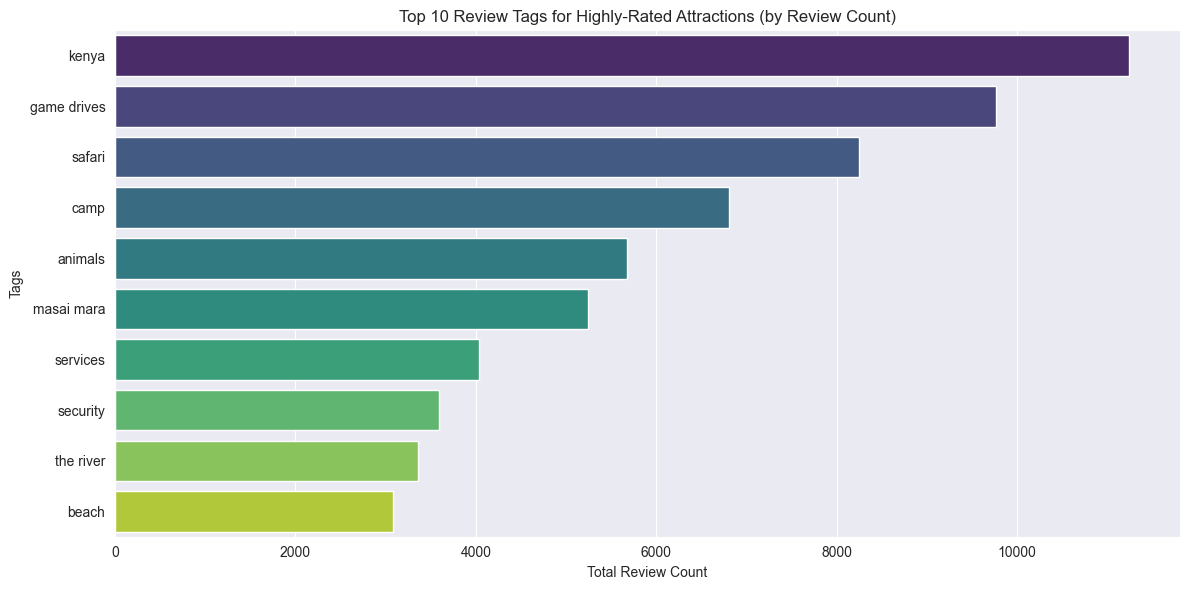


Top 10 tags for highly-rated attractions by total review count:
kenya: 11245
game drives: 9767
safari: 8250
camp: 6804
animals: 5676
masai mara: 5246
services: 4032
security: 3595
the river: 3359
beach: 3083


In [29]:
# Reviewtags by review count
high_rated = data[data['rating'] >= 4.5]

def extract_tags_with_reviews(tags_list):
    return [(tag['text'], tag['reviews']) for tag in tags_list]

all_tags_with_reviews = [item for tags in high_rated['reviewTags'] for item in extract_tags_with_reviews(tags)]
tag_review_counts = Counter()
for tag, reviews in all_tags_with_reviews:
    tag_review_counts[tag] += reviews

top_tags_by_reviews = tag_review_counts.most_common(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=[tag[0] for tag in top_tags_by_reviews], x=[tag[1] for tag in top_tags_by_reviews], palette='viridis')
plt.title('Top 10 Review Tags for Highly-Rated Attractions (by Review Count)')
plt.xlabel('Total Review Count')
plt.ylabel('Tags')
plt.tight_layout()
plt.show()

print("\nTop 10 tags for highly-rated attractions by total review count:")
for tag, count in top_tags_by_reviews:
    print(f"{tag}: {count}")

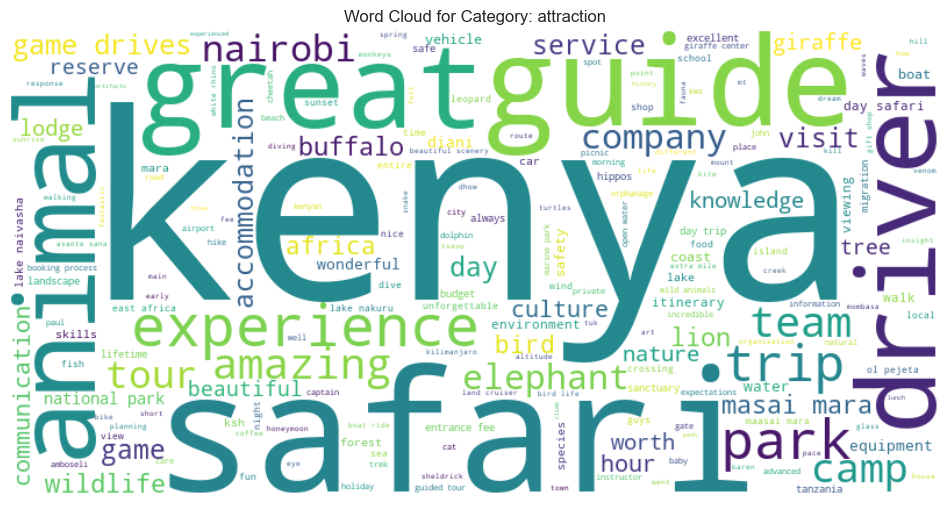

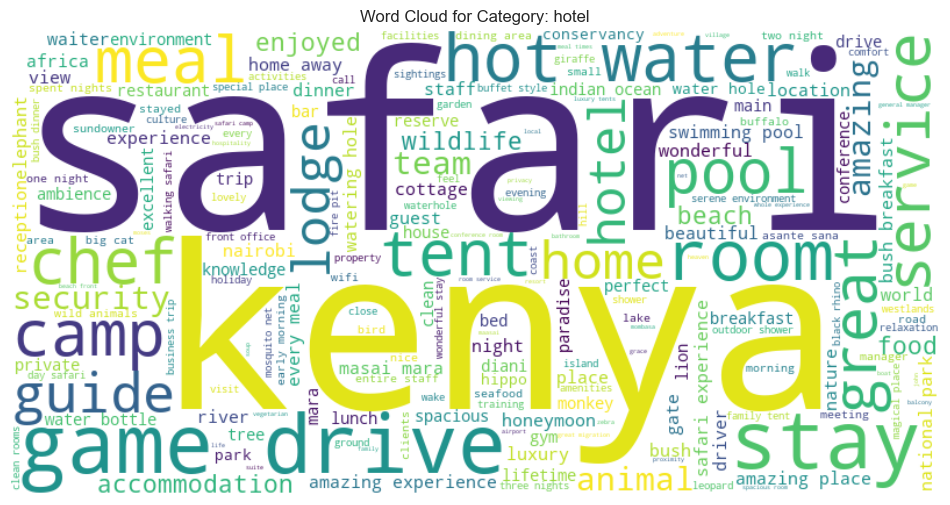

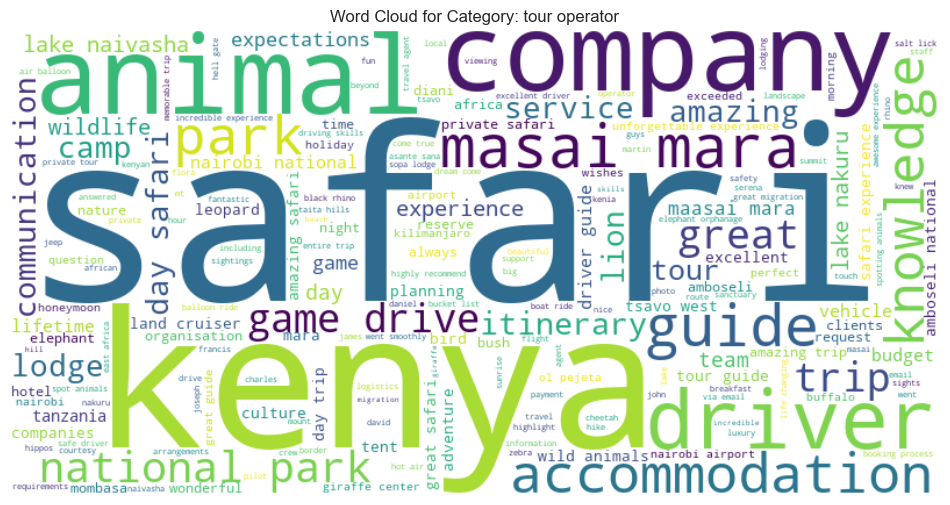

In [30]:
for category in data['category'].unique():
    # Join all texts for the current category into a single string
    category_texts = ' '.join(' '.join(texts) for texts, cat in zip(data['texts'], data['category']) if cat == category)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(category_texts)
    
    # Plot word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Category: {category}')
    plt.show()


### Word Cloud Insights

#### Category: "Attraction"

**Dominant Words:** Safari, Kenya, Guide, Park, Driver, Animal, Experience, Great, National Park, Company

**Key Insights:**
- Safari is the primary attraction, with Kenya being a strong associated term.
- Guided experiences and park visits are crucial aspects.
- The presence of "driver" and "company" suggests organized tours are popular.
- Positive sentiment is indicated by words like "experience" and "great."

#### Category: "Hotel"

**Dominant Words:** Camp, Game, Stay, Food, Animal, Lodge, Pool, Room Service, Hot Water, Tent

**Key Insights:**
- This category focuses on accommodation and facilities within a safari setting.
- Camping and lodges are popular options.
- Amenities like food, pool, and hot water are valued.
- The word "animal" suggests proximity to wildlife is important.

#### Category: "Tour Operator"

**Dominant Words:** Company, Safari, Guide, Team, Knowledge, Masai Mara, Itinerary, Communication, Driver, Animal

**Key Insights:**
- This category emphasizes the role of the operator in providing a safari experience.
- Expertise and knowledge are important attributes of the operator.
- The presence of "Masai Mara" and "itinerary" suggests specific destinations and planned trips.
- Good communication and a strong team are valued.

### Overall Insights:
- Safari in Kenya is the core attraction.
- Guided tours and organized experiences are preferred.
- Accommodation options range from camping to lodges with amenities.
- Operators play a crucial role in providing a successful safari experience.
- Positive sentiment towards the overall experience is evident.


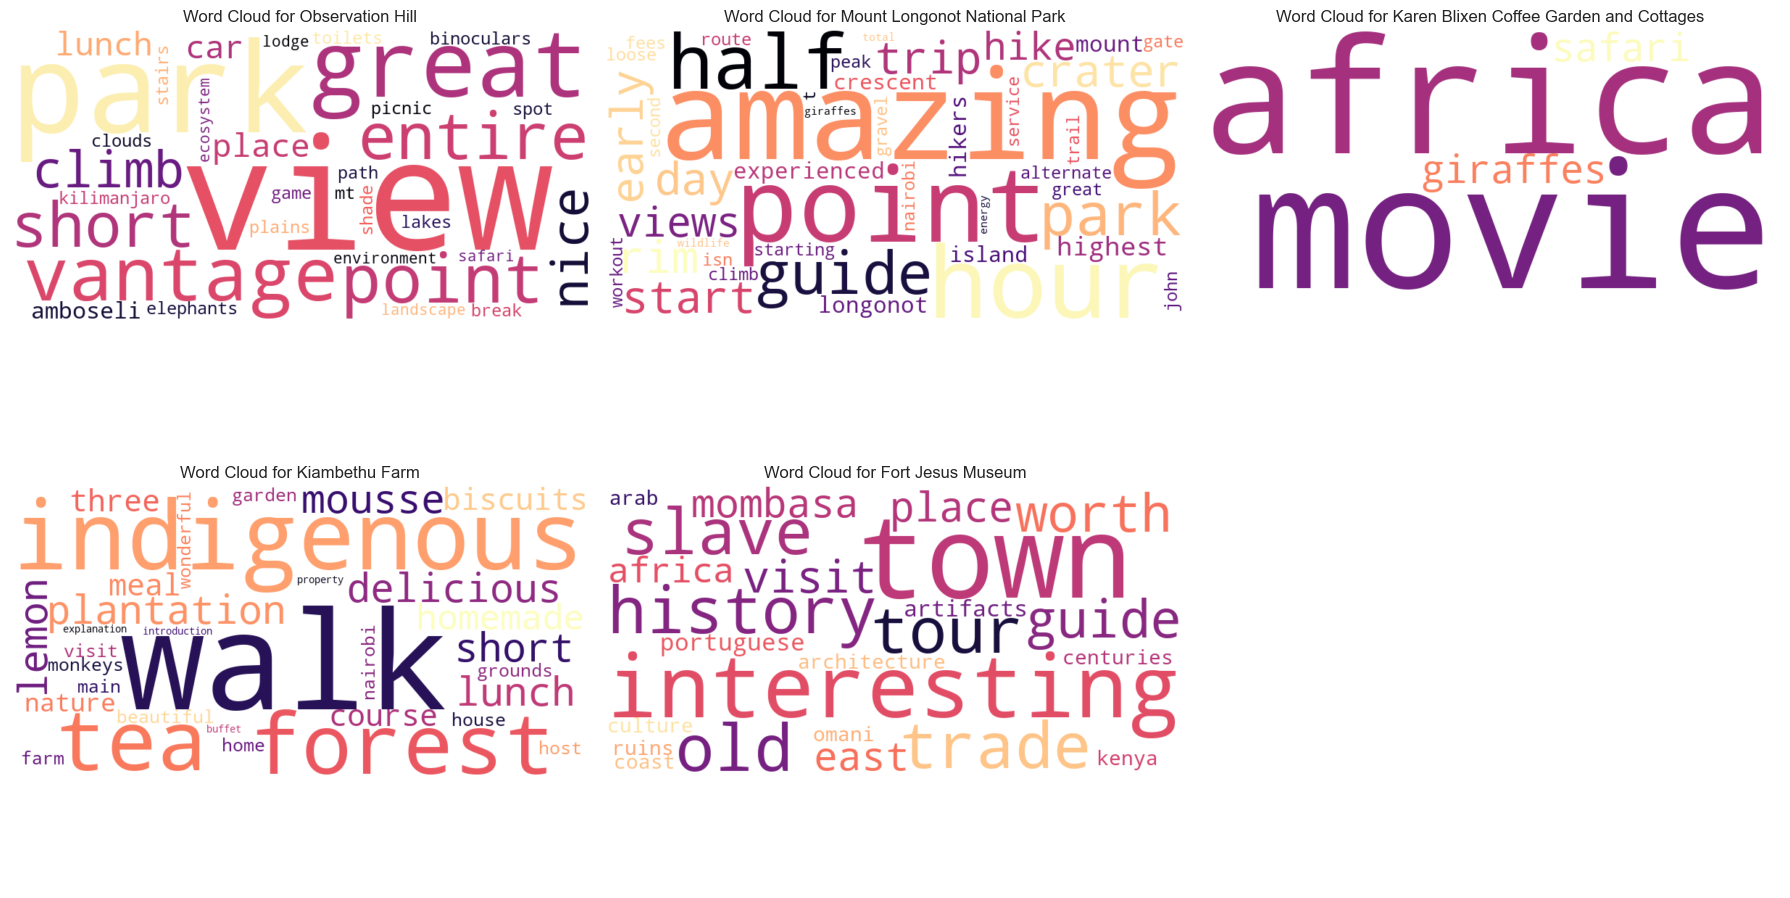

In [31]:
def plot_wordcloud(texts, place_name, ax):
    combined_texts = ' '.join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(combined_texts)
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for {place_name}')

# Number of rows and columns for the subplot grid
n_rows = 2
n_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate and plot word clouds for the top 5 places
for i in range(min(5, len(axes))):
    place_name = data.iloc[i]['name']
    texts = data.iloc[i]['texts']
    plot_wordcloud(texts, place_name, axes[i])

# Hide any unused subplots
for j in range(len(axes)):
    if j >= 5:
        axes[j].axis('off')

plt.tight_layout()
plt.show()


### Overall Insights from the places:

- **Diversity of Experiences:** The word clouds reveal a diverse range of experiences offered by these locations. From adventurous hikes to historical explorations and serene farm visits, there's something for everyone.
- **Emphasis on Nature and Culture:** Nature and cultural heritage are recurring themes across the word clouds, suggesting that visitors appreciate these aspects.
- **Positive Sentiment:** Overall, the word clouds convey a positive sentiment about these places. Visitors use words like "amazing," "beautiful," and "interesting," indicating enjoyable experiences.


### ***Univariate Analysis***

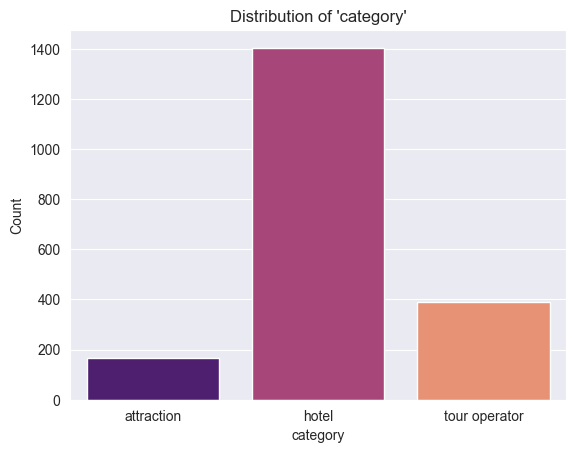

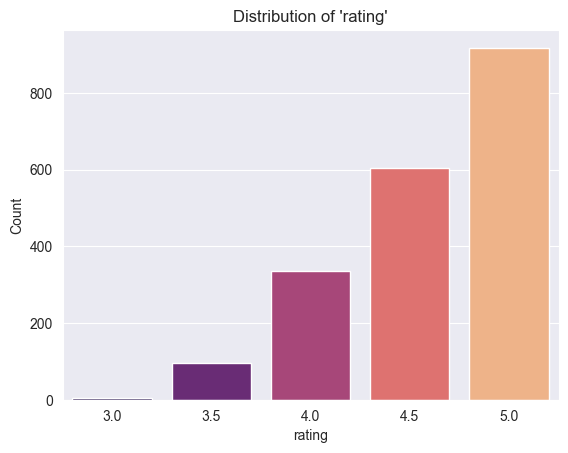

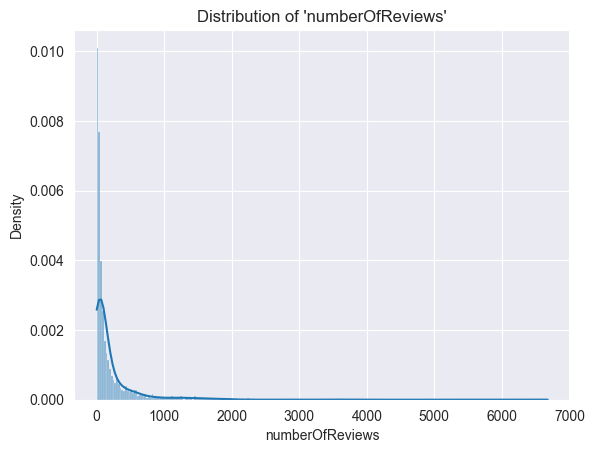

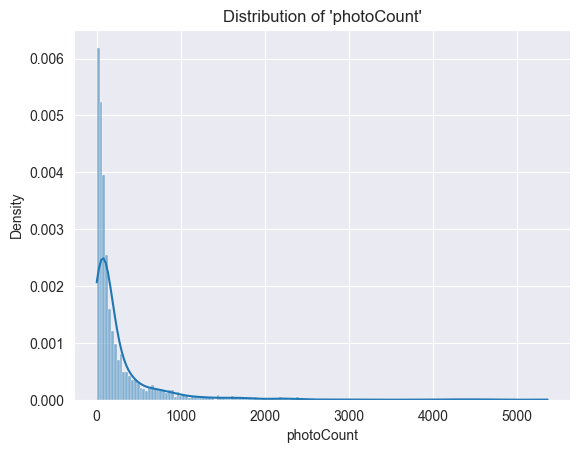

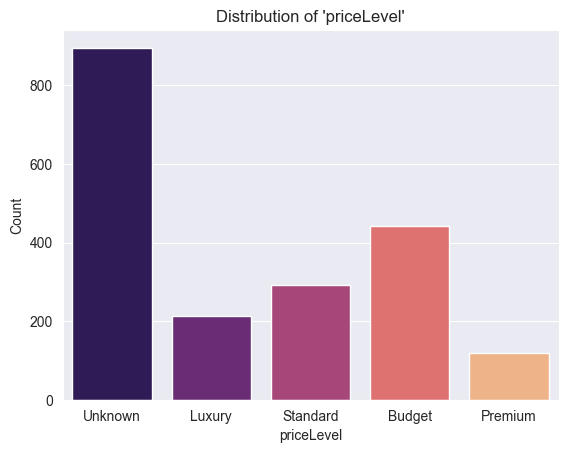

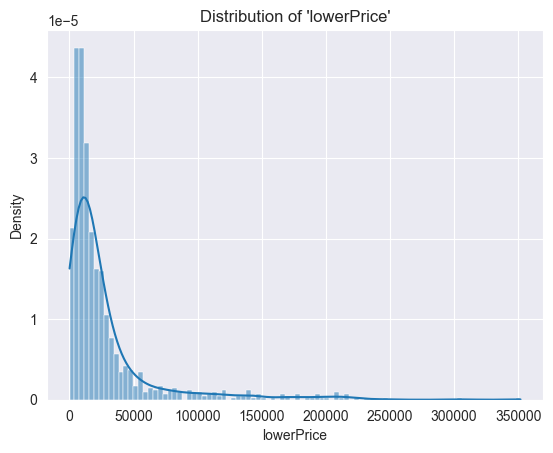

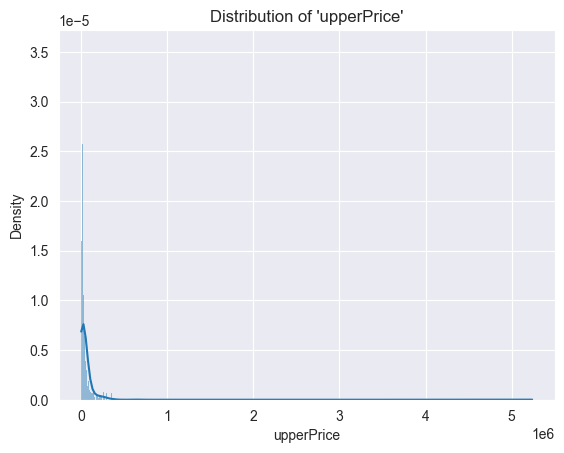

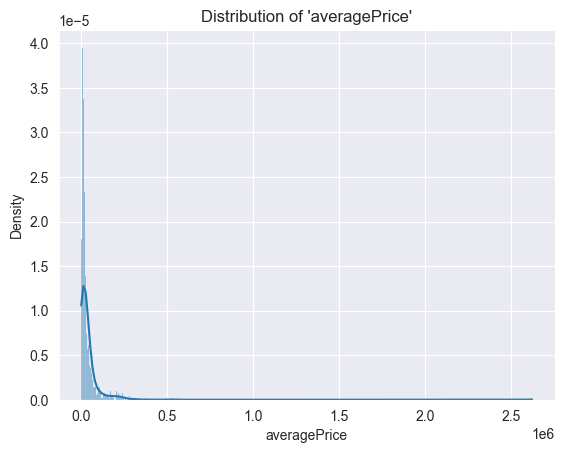

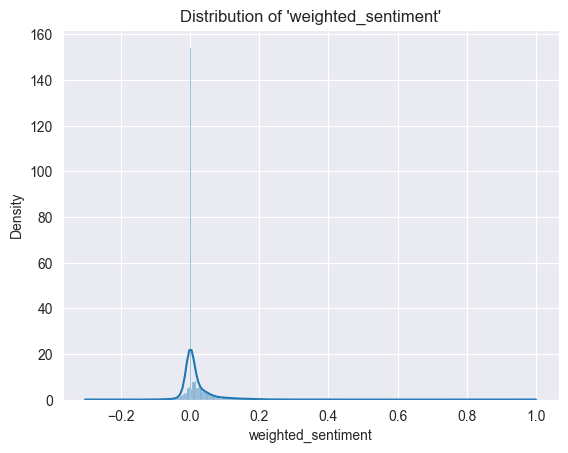

In [32]:
def plot_distribution(data, exclude_columns=[]):
    for col in data.columns:
        # Skip the column if it's in the exclude_columns list
        if col in exclude_columns:
            continue
        
        if data[col].dtype == 'object' or data[col].nunique() < 20:
            # If the column is categorical or has less than 20 unique values, use countplot
            custom_palette = 'magma'
            sns.countplot(data=data, x=col, palette=custom_palette)
            plt.title(f"Distribution of '{col}'")
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks()
            plt.show()
        elif pd.api.types.is_numeric_dtype(data[col]):
            # Plot histogram with KDE for numerical columns
            sns.histplot(data[col], kde=True, stat="density")
            plt.title(f"Distribution of '{col}'")
            plt.xlabel(col)
            plt.ylabel('Density')
            plt.show()

# Example usage
exclude = ['name', 'image', 'priceRange', 'reviewTags', 'photos', 'reviews', 'texts', 'adjusted_sentiment',
           'bigram_counts', 'main_bigram', 'location','locationString','province', 'flattened_bigrams']
plot_distribution(data, exclude_columns=exclude)


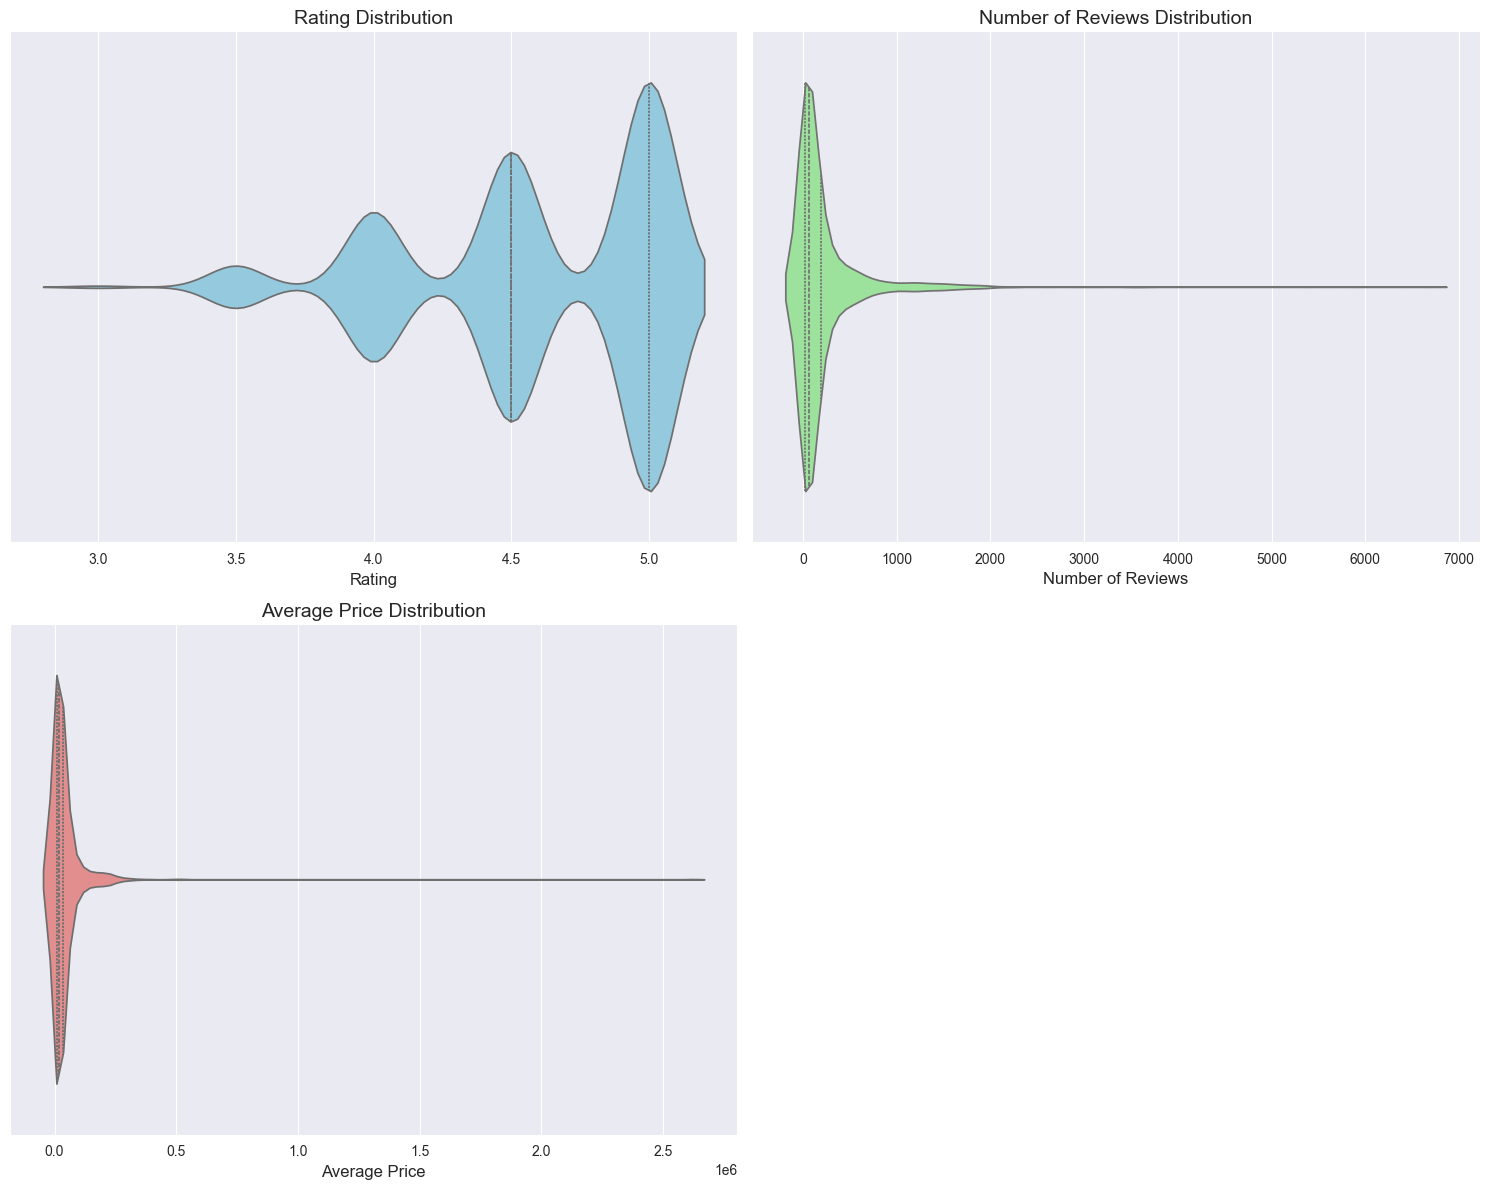

In [33]:
# Outliers in rating, number of reviews, and price range
data['averagePrice'] = (data['lowerPrice'] + data['upperPrice']) / 2

# Create a figure with a 2x2 grid of subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Violin plot for rating distribution
sns.violinplot(x=data['rating'], ax=ax1, inner='quartile', color='skyblue')
ax1.set_title('Rating Distribution', fontsize=14)
ax1.set_xlabel('Rating', fontsize=12)

# Violin plot for number of reviews distribution
sns.violinplot(x=data['numberOfReviews'], ax=ax2, inner='quartile', color='lightgreen')
ax2.set_title('Number of Reviews Distribution', fontsize=14)
ax2.set_xlabel('Number of Reviews', fontsize=12)

# Violin plot for average price distribution
sns.violinplot(x=data['averagePrice'], ax=ax3, inner='quartile', color='lightcoral')
ax3.set_title('Average Price Distribution', fontsize=14)
ax3.set_xlabel('Average Price', fontsize=12)

# Hide the fourth subplot (bottom-right) as we only have three plots
ax4.axis('off')

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
# Print summary statistics
data[['rating', 'numberOfReviews', 'averagePrice']].describe()

rating  numberOfReviews  averagePrice
count  1959.000000      1962.000000  1.066000e+03
mean      4.596223       207.481142  3.753245e+04
std       0.452894       432.480000  9.521558e+04
min       3.000000         0.000000  1.410000e+02
25%       4.500000        25.000000  9.345875e+03
50%       4.500000        60.000000  1.719400e+04
75%       5.000000       189.000000  3.530238e+04
max       5.000000      6677.000000  2.621660e+06

#### Distribution Insights
- **Rating Distribution:** The distribution is heavily skewed towards higher ratings, with a sharp peak around 4.5 and a long tail towards lower ratings. This suggests that while most reviews are positive, there's still a significant portion with lower ratings.
  
- **Number of Reviews Distribution:** The distribution is skewed, with most businesses having a lower number of reviews and a few outliers with a large number of reviews, indicating a few businesses dominate in visibility.
  
- **Average Price Distribution:** The distribution is highly skewed, with the majority of businesses having an average price below 1.0. A few outliers have significantly higher average prices.

#### Insights
- **Customer Satisfaction:** The high concentration of ratings around 4.5 suggests overall customer satisfaction is relatively high, though there's room for improvement as indicated by the long tail of lower ratings.
  
- **Market Competition:** The skewed distribution of the number of reviews suggests a competitive market, with a few businesses attracting most of the customer attention.
  
- **Price Sensitivity:** The highly skewed average price distribution indicates that the market largely caters to budget-conscious customers, suggesting that businesses with higher prices may need to focus on differentiation beyond just price.


### ***Correlation Analysis***

Label encode the priceLevel so as to perform a correlation analysis.

In [35]:
label_encoder = LabelEncoder()
data['priceLevelencoded'] = label_encoder.fit_transform(data['priceLevel'])


The following columns were dropped due to being object types:
['name', 'category', 'image', 'priceRange', 'reviewTags', 'priceLevel', 'locationString', 'texts', 'reviews', 'location', 'province', 'bigram_counts', 'flattened_bigrams', 'main_bigram']


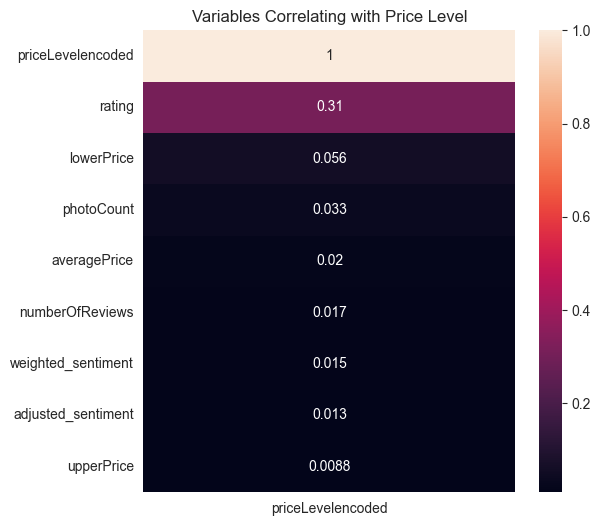

In [36]:
def correlation(df,column=None,rank=None):
    '''
    performs correlation matrix, drops non numeric object types
    variables are dataframe, column, and ranking
    ranking is optional
    column = 'column'
    rank = True for # rank 1,2,3...
    
    '''
    # Redundant check. Makes sure all columns of object type are dropped
    df_object = df.select_dtypes(include='object')
    print(f'The following columns were dropped due to being object types:\n{df_object.columns.tolist()}')
    df = df.drop(df_object,axis=1) 
    df1 = df
    if rank is True:
        try:
            df_corr = df1.corr()[column]
            df_corr = df_corr.drop(column)
            print(f'Ranked correlation to {column}')
            return(df_corr.rank(ascending=False).sort_values())
        except:
            df_corr = df1.corr()
            return(df_corr.rank(ascending=False))
    else:    
        try:
            df_corr = df.corr()[column]
            df_corr = df_corr.drop(column)
            print(f'Correlation to {column}')
            return(df_corr.sort_values(ascending=False))
        except:
            df_corr = df1.corr()
            return(df_corr)

# Getting the correlation between variables
df_corr = abs(correlation(data))
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df_corr[['priceLevelencoded']].sort_values(by='priceLevelencoded',ascending=False),annot = True)

ax.set_title('Variables Correlating with Price Level');
# plt.savefig('Group_plots/correlation_plot.png', dpi=100)

### Strong Correlation with Price Level:

- **Perfect Correlation:** `priceLevelEncoded` has a perfect correlation with itself (1.0), as expected.
- **Rating:** Shows a strong positive correlation with price level (0.31), indicating that higher-priced listings tend to have higher ratings.
- **Lower Price:** Has a weak positive correlation (0.056) with price level, which might seem counterintuitive and warrants further investigation.
- **Photo Count:** Exhibits a moderate positive correlation (0.033) with price level, suggesting that listings with more photos tend to be priced higher.
- **Number of Reviews:** Displays a weak positive correlation (0.017) with price level, indicating a slight tendency for listings with more reviews to have higher prices.
- **Sentiment:** Both `weighted_sentiment` and `adjusted_sentiment` have very weak positive correlations (0.015 and 0.013, respectively) with price level, suggesting minimal impact of sentiment on price.
- **Upper Price:** Shows a very weak positive correlation (0.0088) with price level, indicating a negligible relationship between upper price and overall price level.


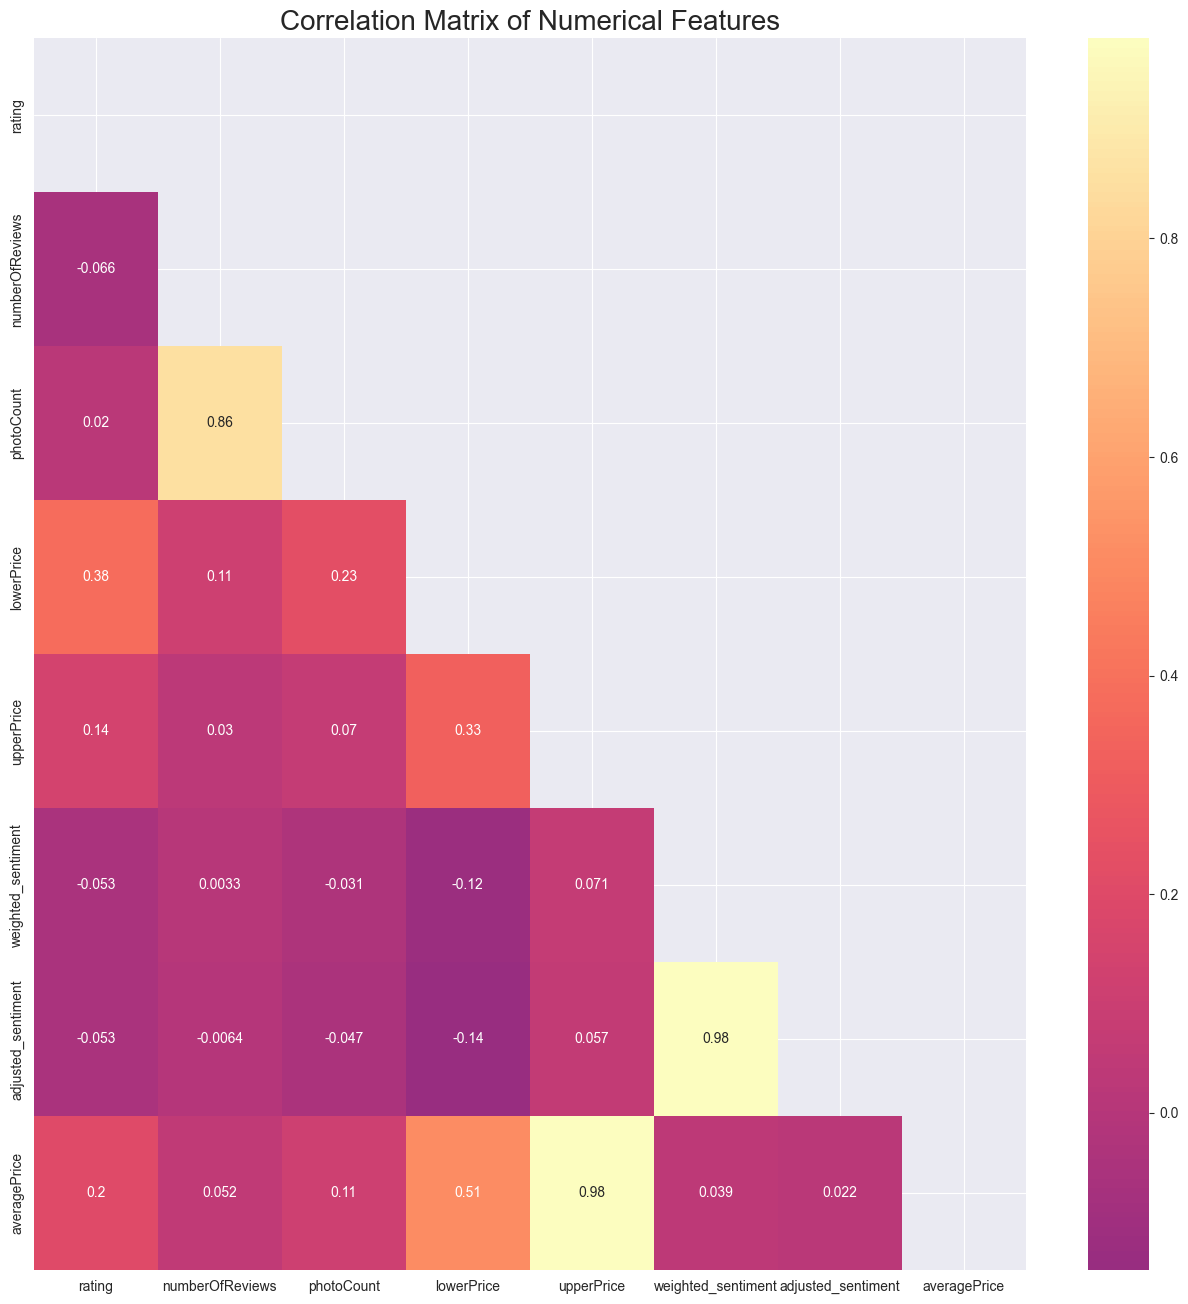

In [37]:
# Create a correlation matrix
numerical_columns = [
    'rating',
    'numberOfReviews',
    'photoCount',
    'lowerPrice',
    'upperPrice',
    'weighted_sentiment',
    'adjusted_sentiment',
    'averagePrice'
]

corr_matrix = data[numerical_columns].corr()
# Create a fig size
plt.figure(figsize=(16, 16))
# Create a mask to show only the lower triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Plot the heatmap with the lower triangle mask applied
sns.heatmap(corr_matrix, mask=mask, cmap='magma', center=0, annot=True)
plt.title('Correlation Matrix of Numerical Features', fontsize=20)
# Show the plot
plt.show();

#### Correlation Insights:

- **`Photo Count` and `Number of Reviews`:** Have a moderate positive correlation (0.46), suggesting that restaurants with more reviews tend to have more photos.
- **`Rating` and `Adjusted Sentiment`:** Show a moderate positive correlation (0.37), indicating that higher ratings tend to be associated with more positive sentiment.
- **`Review Count` and `Rating`:** Display a moderate positive correlation (0.27), suggesting that restaurants with more reviews tend to have higher ratings.


### ***Bivariate Analysis***

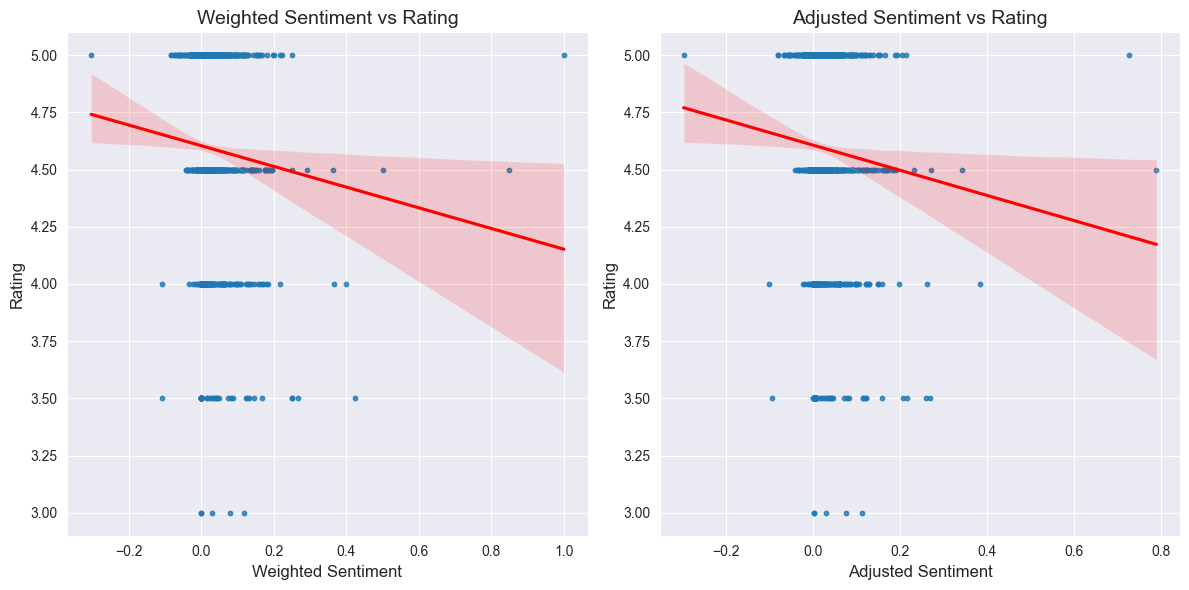

In [38]:
# Create a figure with a specified size
plt.figure(figsize=(12, 6))

# First subplot: Weighted Sentiment vs Rating
plt.subplot(1, 2, 1)
sns.regplot(x='weighted_sentiment', y='rating', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Weighted Sentiment vs Rating', fontsize=14)
plt.xlabel('Weighted Sentiment', fontsize=12)
plt.ylabel('Rating', fontsize=12)

# Second subplot: Adjusted Sentiment vs Rating
plt.subplot(1, 2, 2)
sns.regplot(x='adjusted_sentiment', y='rating', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Adjusted Sentiment vs Rating', fontsize=14)
plt.xlabel('Adjusted Sentiment', fontsize=12)
plt.ylabel('Rating', fontsize=12)

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

* There is no discernible linear relationship or pattern suggesting that higher sentiment values consistently correspond to higher ratings

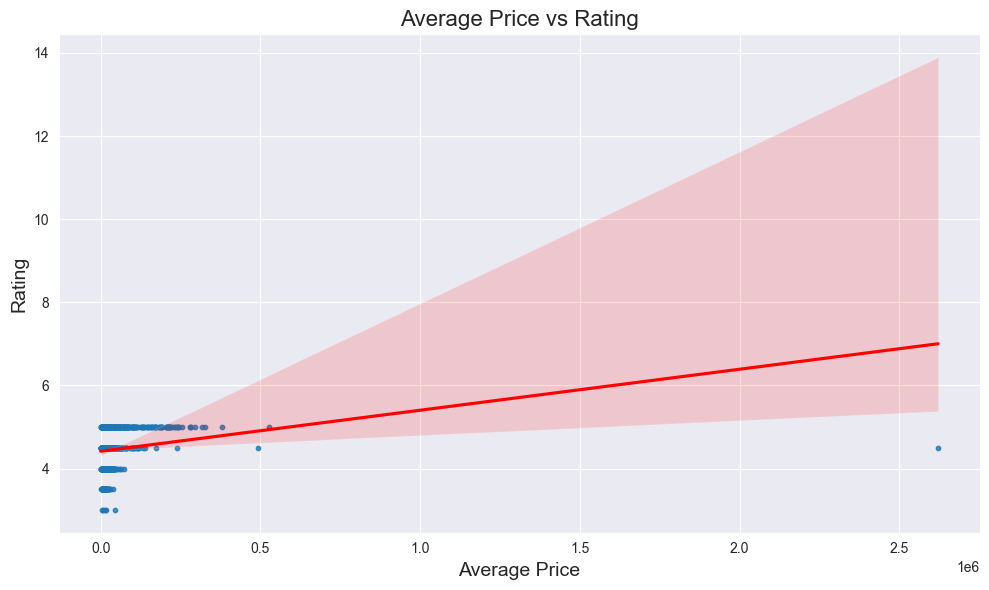

In [39]:
#  Relationship between price range and rating
data['averagePrice'] = (data['lowerPrice'] + data['upperPrice']) / 2

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='averagePrice', y='rating', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Add title and labels
plt.title('Average Price vs Rating', fontsize=16)
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Rating', fontsize=14)

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

**Limited Correlation:** There appears to be a weak positive correlation between average price and rating. This means that, generally, as the average price increases, the rating tends to increase slightly as well. However, this relationship is not very strong.


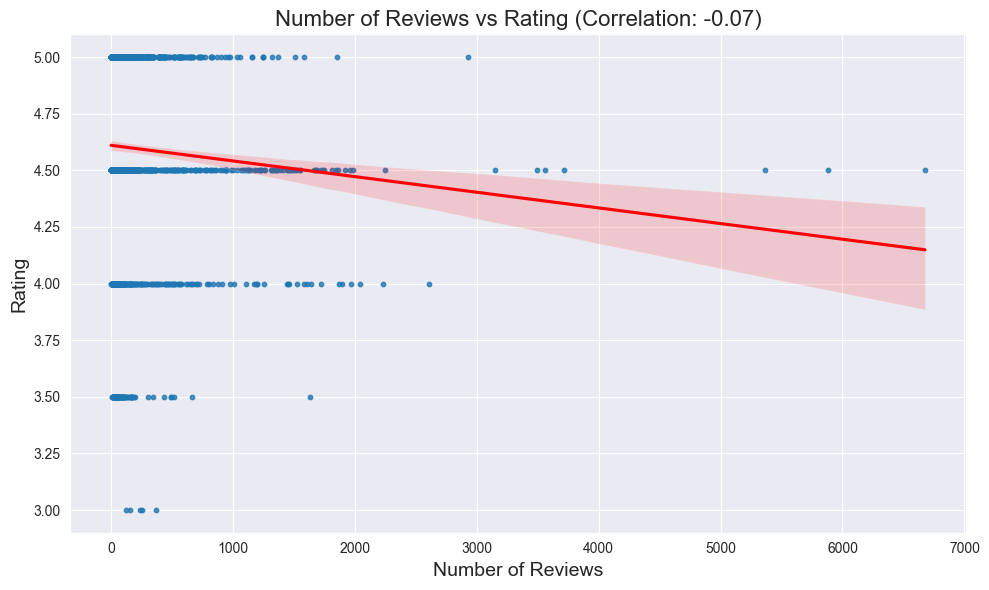

In [40]:
#  Correlation between number of reviews and rating
correlation = data['numberOfReviews'].corr(data['rating'])

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='numberOfReviews', y='rating', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Add title and labels
plt.title(f'Number of Reviews vs Rating (Correlation: {correlation:.2f})', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Rating', fontsize=14)

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

*  A weak negative correlation between the number of reviews and the rating. This means that as the number of reviews increases, the rating tends to slightly decrease, but the relationship is not very strong.

Correlation between photo count and rating: 0.02
Correlation between photo count and number of reviews: 0.86


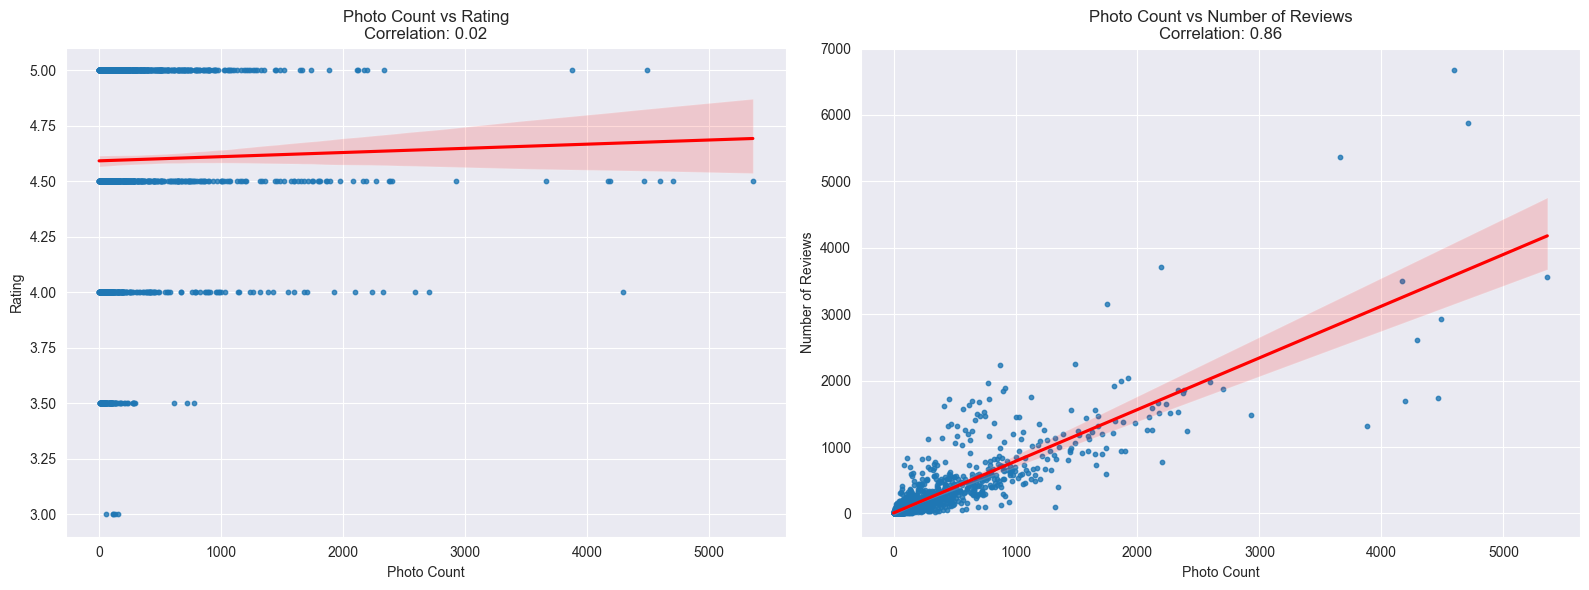

In [41]:
#  Correlation between number of photos and rating/reviews
photo_rating_corr = data['photoCount'].corr(data['rating'])
photo_reviews_corr = data['photoCount'].corr(data['numberOfReviews'])

print(f"Correlation between photo count and rating: {photo_rating_corr:.2f}")
print(f"Correlation between photo count and number of reviews: {photo_reviews_corr:.2f}")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with regression line for photo count vs rating
sns.regplot(x='photoCount', y='rating', data=data, ax=axes[0], scatter_kws={'s': 10}, line_kws={'color': 'red'})
axes[0].set_title(f'Photo Count vs Rating\nCorrelation: {photo_rating_corr:.2f}')
axes[0].set_xlabel('Photo Count')
axes[0].set_ylabel('Rating')

# Scatter plot with regression line for photo count vs number of reviews
sns.regplot(x='photoCount', y='numberOfReviews', data=data, ax=axes[1], scatter_kws={'s': 10}, line_kws={'color': 'red'})
axes[1].set_title(f'Photo Count vs Number of Reviews\nCorrelation: {photo_reviews_corr:.2f}')
axes[1].set_xlabel('Photo Count')
axes[1].set_ylabel('Number of Reviews')

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()



 **Photo Count and Rating:** The quality of the photos, rather than the quantity, likely has a greater impact on the rating.
Focus on uploading high-quality, relevant images to showcase the listing effectively.



**Photo Count and Reviews:** More photos can attract attention and encourage users to engage with the listing, leading to more reviews.


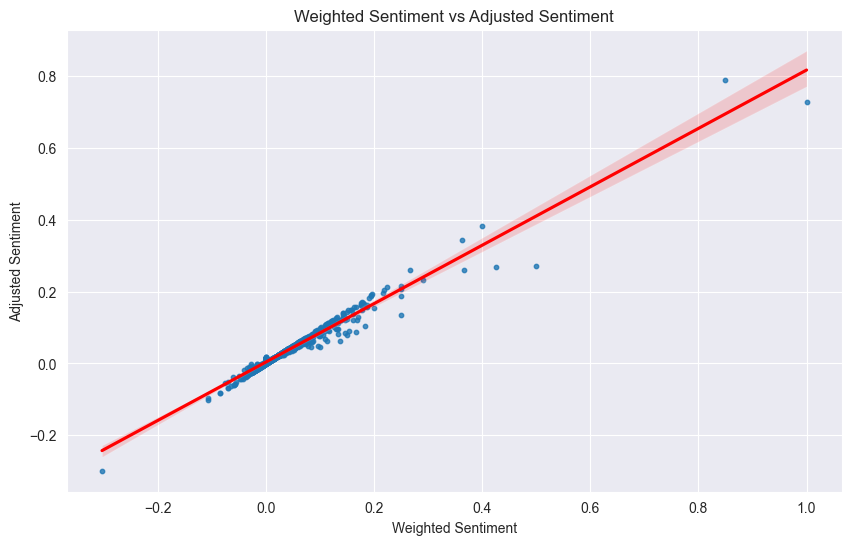

In [42]:
# Weighted Sentiment vs Adjusted Sentiment 
plt.figure(figsize=(10, 6))
sns.regplot(x='weighted_sentiment', y='adjusted_sentiment', data=data, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Weighted Sentiment vs Adjusted Sentiment')
plt.xlabel('Weighted Sentiment')
plt.ylabel('Adjusted Sentiment')
plt.show()

**Strong Relationship:** strong positive relationship,This indicates that the adjustment process applied to the original sentiment scores preserves the overall sentiment directionality.

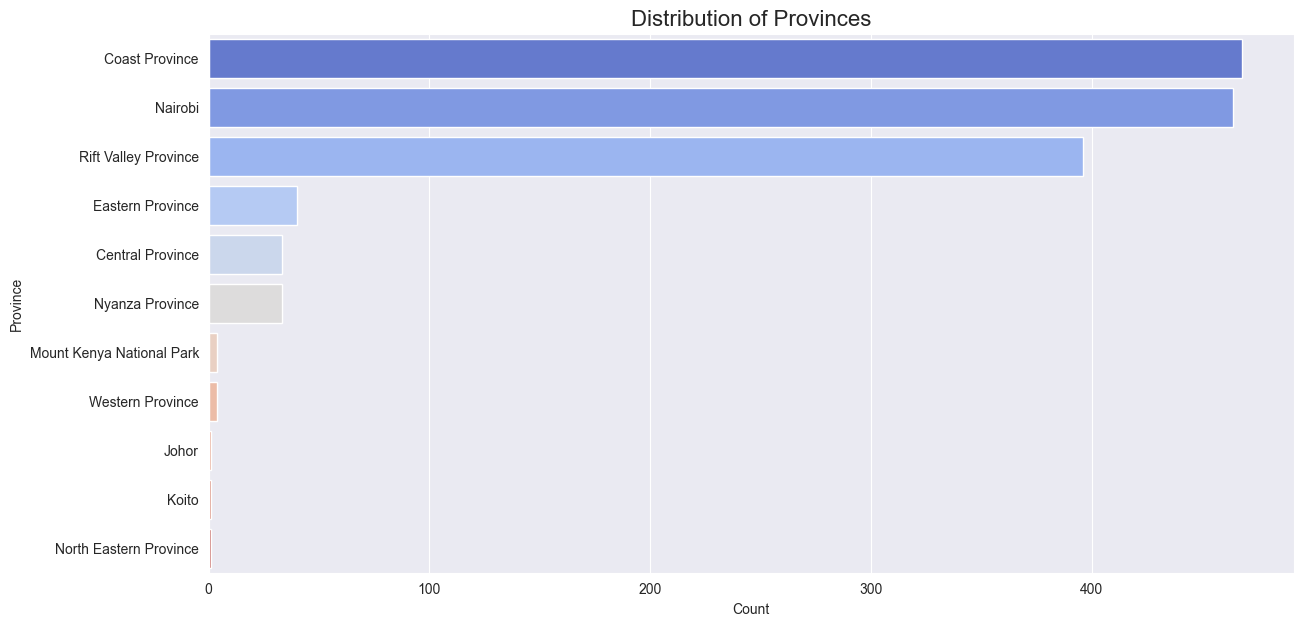

In [43]:
# Bar plot for Province Distribution
plt.figure(figsize=(14, 7))
sns.countplot(y='province', data=data, order=data['province'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Provinces', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Province')
plt.show()

In [44]:
import plotly.express as px

# Aggregate data by province
province_aggregates = data.groupby('province').agg({
    'rating': 'mean',
    'numberOfReviews': 'sum',
    'weighted_sentiment': 'mean',
    'adjusted_sentiment': 'mean'
}).reset_index()

# Rename columns for clarity
province_aggregates.columns = ['Province', 'Average Rating', 'Total Reviews', 'Average Weighted Sentiment', 'Average Adjusted Sentiment']

# Display the aggregated data
province_aggregates

Province  Average Rating  Total Reviews  \
0            Central Province        4.363636           4192   
1              Coast Province        4.622863         126450   
2            Eastern Province        4.475000           4625   
3                       Johor        3.500000            109   
4                       Koito        4.500000             37   
5   Mount Kenya National Park        4.500000           1317   
6                     Nairobi        4.669181         119249   
7      North Eastern Province        4.000000             28   
8             Nyanza Province        4.378788           2624   
9        Rift Valley Province        4.667929          94146   
10           Western Province        4.250000            338   

    Average Weighted Sentiment  Average Adjusted Sentiment  
0                     0.040704                    0.036901  
1                     0.019882                    0.020324  
2                     0.025854                    0.021729  
3                     0.043333                    0.041201  
4                     0.000000                    0.003822  
5                     0.021593                    0.021217  
6                     0.024855                    0.024071  
7                     0.000000                    0.004727  
8                     0.028251                    0.027365  
9                     0.014296                    0.014512  
10                   -0.006320                   -0.002002

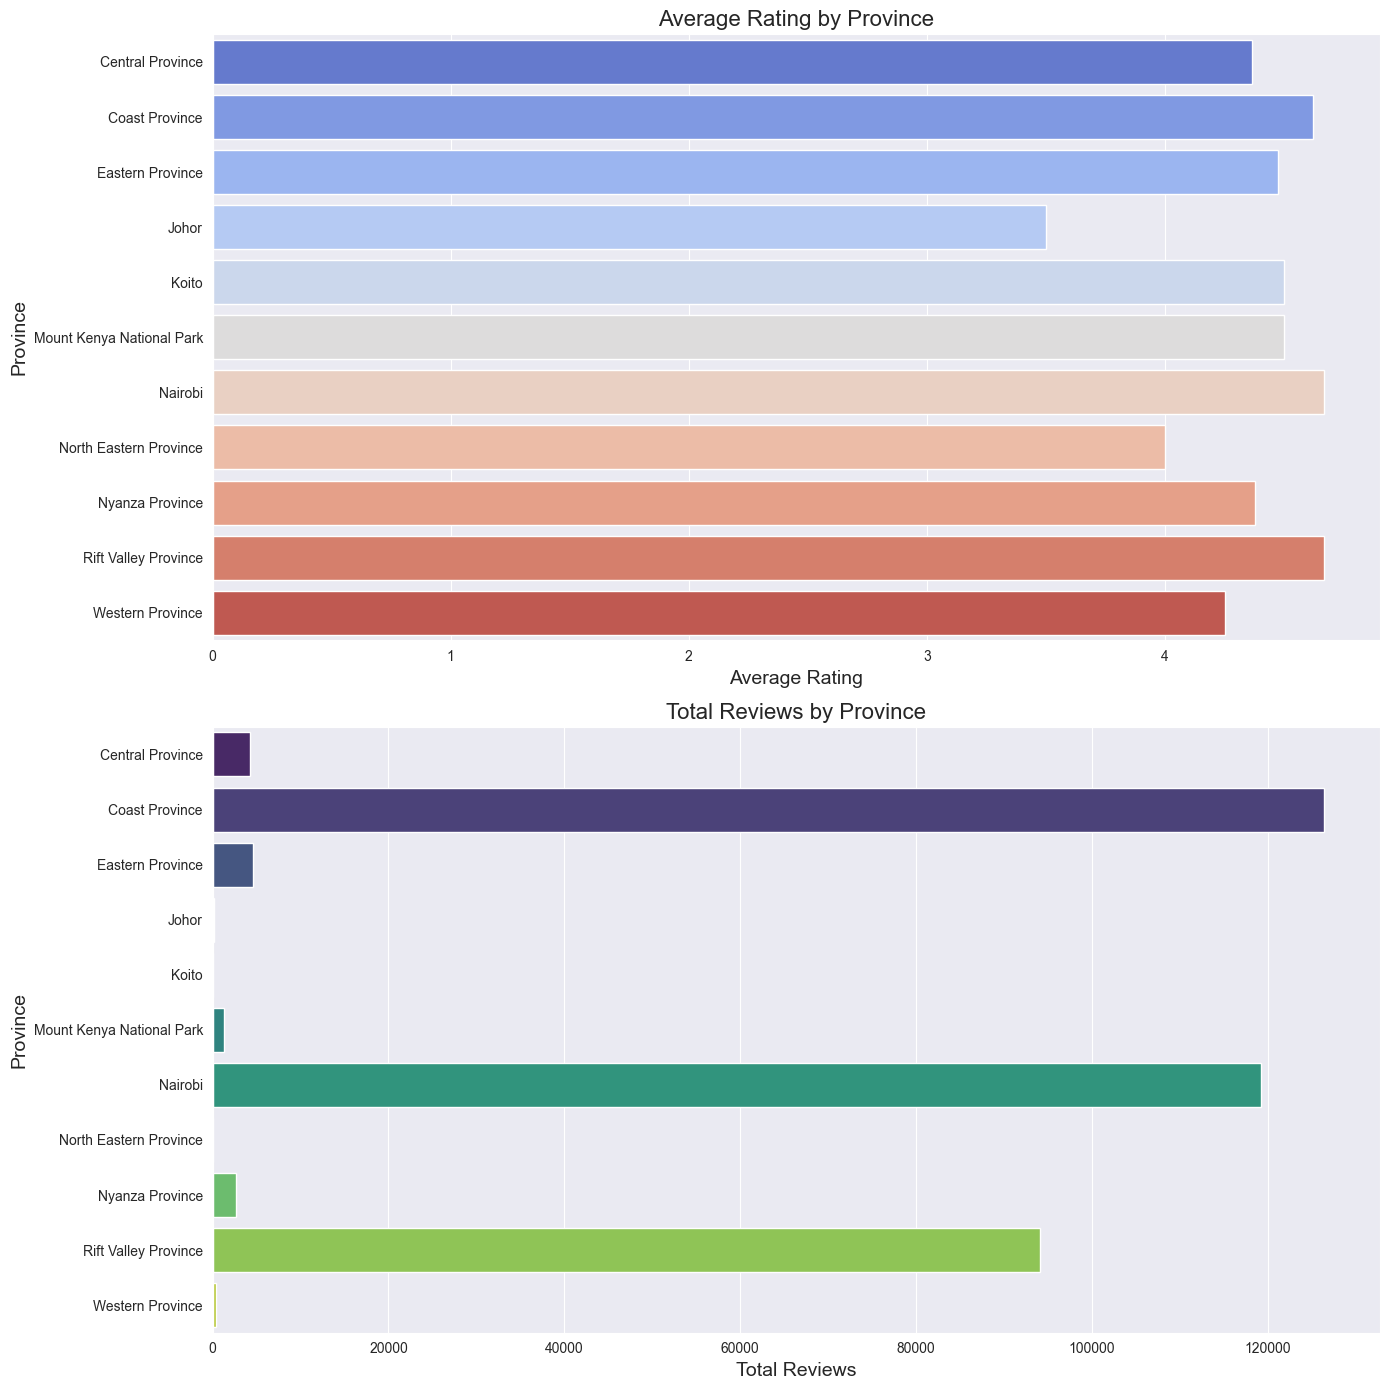

In [45]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))

# Bar plot for Average Rating by Province
sns.barplot(y='Province', x='Average Rating', data=province_aggregates, palette='coolwarm', ax=ax1)
ax1.set_title('Average Rating by Province', fontsize=16)
ax1.set_xlabel('Average Rating', fontsize=14)
ax1.set_ylabel('Province', fontsize=14)

# Bar plot for Total Reviews by Province
sns.barplot(y='Province', x='Total Reviews', data=province_aggregates, palette='viridis', ax=ax2)
ax2.set_title('Total Reviews by Province', fontsize=16)
ax2.set_xlabel('Total Reviews', fontsize=14)
ax2.set_ylabel('Province', fontsize=14)

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

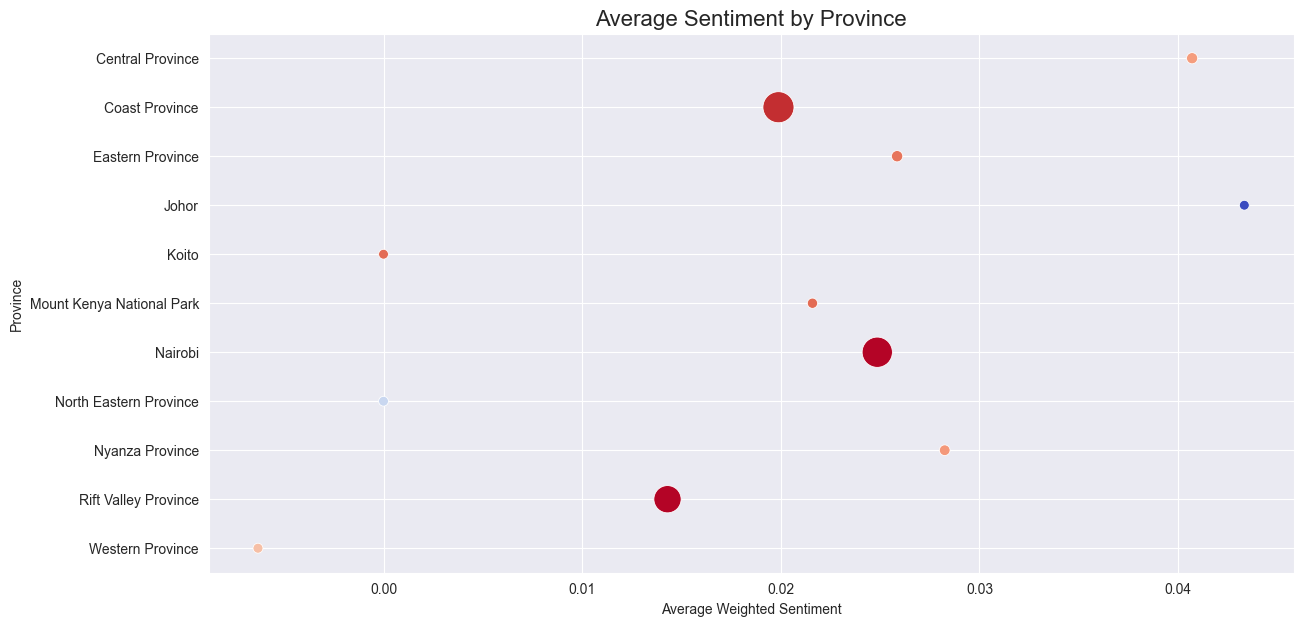

In [46]:
# Scatter plot for Average Sentiment by Province
plt.figure(figsize=(14, 7))
sns.scatterplot(y='Province', x='Average Weighted Sentiment', data=province_aggregates, size='Total Reviews', sizes=(50, 500), hue='Average Rating', palette='coolwarm', legend=False)
plt.title('Average Sentiment by Province', fontsize=16)
plt.xlabel('Average Weighted Sentiment')
plt.ylabel('Province')
plt.show()


- **High Sentiment:** A few provinces stand out with notably higher sentiment scores:
  - Nairobi
  - Rift Valley Province
  - Coast Province
  
  This could indicate factors contributing to positive sentiment
- **Low Sentiment:** Several provinces exhibit lower sentiment scores, with some clustering near the 0.00 mark:
  - Central Province
  - Western Province
  - North Eastern Province


In [47]:
province_aggregates = data.groupby('province').agg({
    'rating': 'mean',
    'numberOfReviews': 'sum',
    'weighted_sentiment': 'mean',
    'adjusted_sentiment': 'mean'
}).reset_index()
#print(province_aggregates)

top_locations = data.groupby(['province', 'name']).agg({
    'rating': 'mean',
    'numberOfReviews': 'sum',
    'weighted_sentiment': 'mean'
}).sort_values(by='rating', ascending=False).reset_index()
top_locations

province                                 name  rating  \
0                  Nairobi  Holiday Inn Nairobi Two Rivers Mall     5.0   
1                  Nairobi       African Authentic  Safaris Ltd     5.0   
2                  Nairobi               Africa Celebrity Tours     5.0   
3                  Nairobi      Africa Flash McTours and Travel     5.0   
4                  Nairobi                 Africa Kenya Safaris     5.0   
...                    ...                                  ...     ...   
1440  Rift Valley Province                   Taphe Guest Resort     3.5   
1441  Rift Valley Province                Naro Moru River Lodge     3.5   
1442               Nairobi                      Hotel Boulevard     3.0   
1443               Nairobi           Ledger Plaza Hotel Nairobi     3.0   
1444        Coast Province           Sentrim Castle Royal Hotel     3.0   

      numberOfReviews  weighted_sentiment  
0                  64            0.048529  
1                  28            0.000000  
2                  50            0.016940  
3                 446            0.030231  
4                 192            0.100694  
...               ...                 ...  
1440               59            0.034091  
1441              116            0.048333  
1442              373            0.000000  
1443              253            0.000000  
1444              161            0.078947  

[1445 rows x 5 columns]

### ***Top 10  Locations***

In [48]:
# Exclude rows where location or province is None
filtered_data = data.dropna(subset=['location', 'province'])

# Re-calculate the top 10 names based on average rating after excluding rows with missing values
top_10_names = filtered_data.groupby('name').agg({
    'rating': 'mean',
    'category': 'first',
    'location': 'first',
    'province': 'first'
}).nlargest(10, 'rating')

# Reset index to get 'name' as a column
top_10_names = top_10_names.reset_index()

# Display the table with name, rating, category, location, and province
print("Top 10 Names by Average Rating:")
top_10_names[['name', 'rating', 'category', 'location', 'province']]


Top 10 Names by Average Rating:


name  rating       category     location  \
0           APODIFORMES ADVENTURES     5.0  tour operator      Nairobi   
1              Abdull Safari Kenya     5.0  tour operator       Watamu   
2         Absolute Vantage Limited     5.0     attraction      Nairobi   
3                Acacia Tree Lodge     5.0          hotel      Nairobi   
4  Across The Wild Tours & Safaris     5.0  tour operator      Nairobi   
5                    Adventure 360     5.0  tour operator      Nairobi   
6       Adventure Wildlife Safaris     5.0  tour operator      Nairobi   
7             Aestus Villas Resort     5.0          hotel  Diani Beach   
8           Africa Celebrity Tours     5.0  tour operator      Nairobi   
9  Africa Flash McTours and Travel     5.0  tour operator      Nairobi   

         province  
0         Nairobi  
1  Coast Province  
2         Nairobi  
3         Nairobi  
4         Nairobi  
5         Nairobi  
6         Nairobi  
7  Coast Province  
8         Nairobi  
9         Nairobi

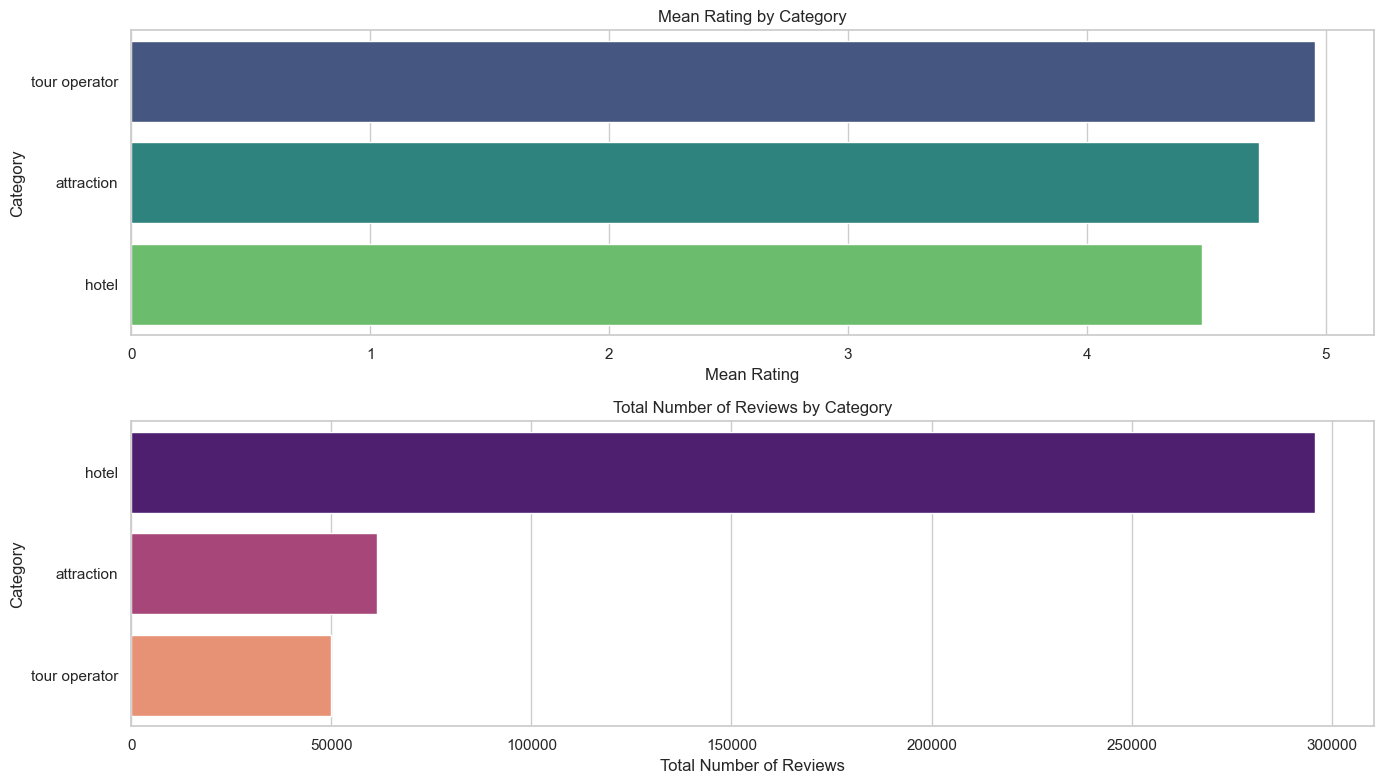

In [49]:
# Calculate mean rating and total number of reviews by category
category_analysis = data.groupby('category').agg({
    'rating': 'mean',
    'numberOfReviews': 'sum'
}).reset_index()

# Sort the data
category_analysis_sorted_by_rating = category_analysis.sort_values(by='rating', ascending=False)
category_analysis_sorted_by_reviews = category_analysis.sort_values(by='numberOfReviews', ascending=False)

# Set the figure size and style 
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot for mean rating by category
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
sns.barplot(x='rating', y='category', data=category_analysis_sorted_by_rating, palette='viridis')
plt.title('Mean Rating by Category')
plt.xlabel('Mean Rating')
plt.ylabel('Category')

# Plot for total number of reviews by category
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
sns.barplot(x='numberOfReviews', y='category', data=category_analysis_sorted_by_reviews, palette='magma')
plt.title('Total Number of Reviews by Category')
plt.xlabel('Total Number of Reviews')
plt.ylabel('Category')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [50]:
# Average Rating and Number of Reviews by Category
review_stats_by_category = data.groupby('category')[['rating', 'numberOfReviews']].mean().reset_index()
review_stats_by_category.columns = ['Category', 'Average Rating', 'Average Number of Reviews']
review_stats_by_category

Category  Average Rating  Average Number of Reviews
0     attraction        4.722892                 367.215569
1          hotel        4.481098                 210.658832
2  tour operator        4.955243                 127.846547

#### Tour Operators Shine
- Tour operators have the highest average rating, indicating strong customer satisfaction with their services.
- However, they have the lowest number of reviews, which could suggest less exposure or a smaller tourists base compared to other categories.

##### Hotels Dominate Reviews
- Hotels receive the most reviews, making them the most reviewed category.
- This could be due to a larger number of hotels or a higher tendency for tourists to leave reviews for hotel experiences.

##### Attraction Satisfaction
- Attractions fall in the middle for both average rating and total number of reviews.
- This suggests a balance between tourists satisfaction and review volume.


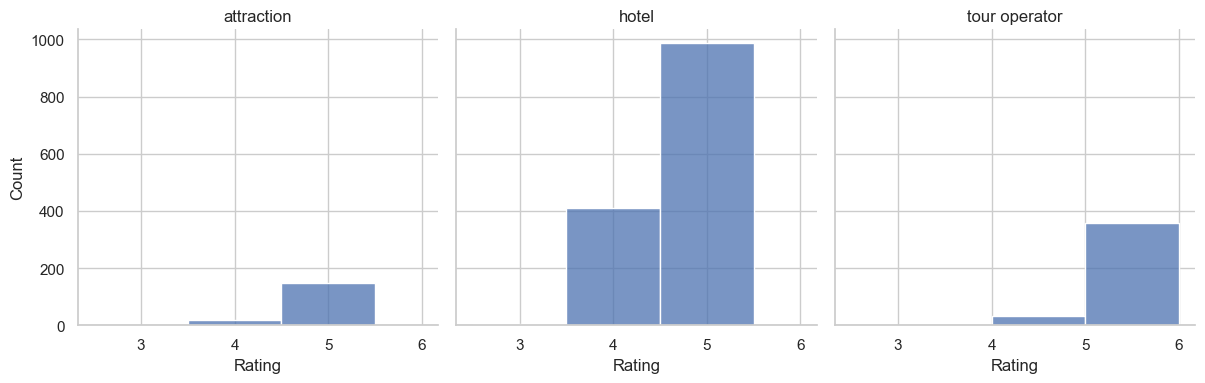

In [51]:
#  Distribution of ratings across different categories
g = sns.FacetGrid(data, col="category", col_wrap=4, height=4)
g.map(sns.histplot, "rating", discrete=True)

# Set the titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Rating", "Count")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

#### Hotel Ratings

- The **hotel** category exhibits the highest overall count of ratings.
- It displays a pronounced peak around the rating of **5**, suggesting a larger concentration of positive reviews for hotels compared to the other two categories.

#### Attraction and Tour Operator: Room for Improvement

- Both **attractions** and **tour operators** might have room for improvement in customer satisfaction, as evidenced by their lower rating counts and flatter distribution.


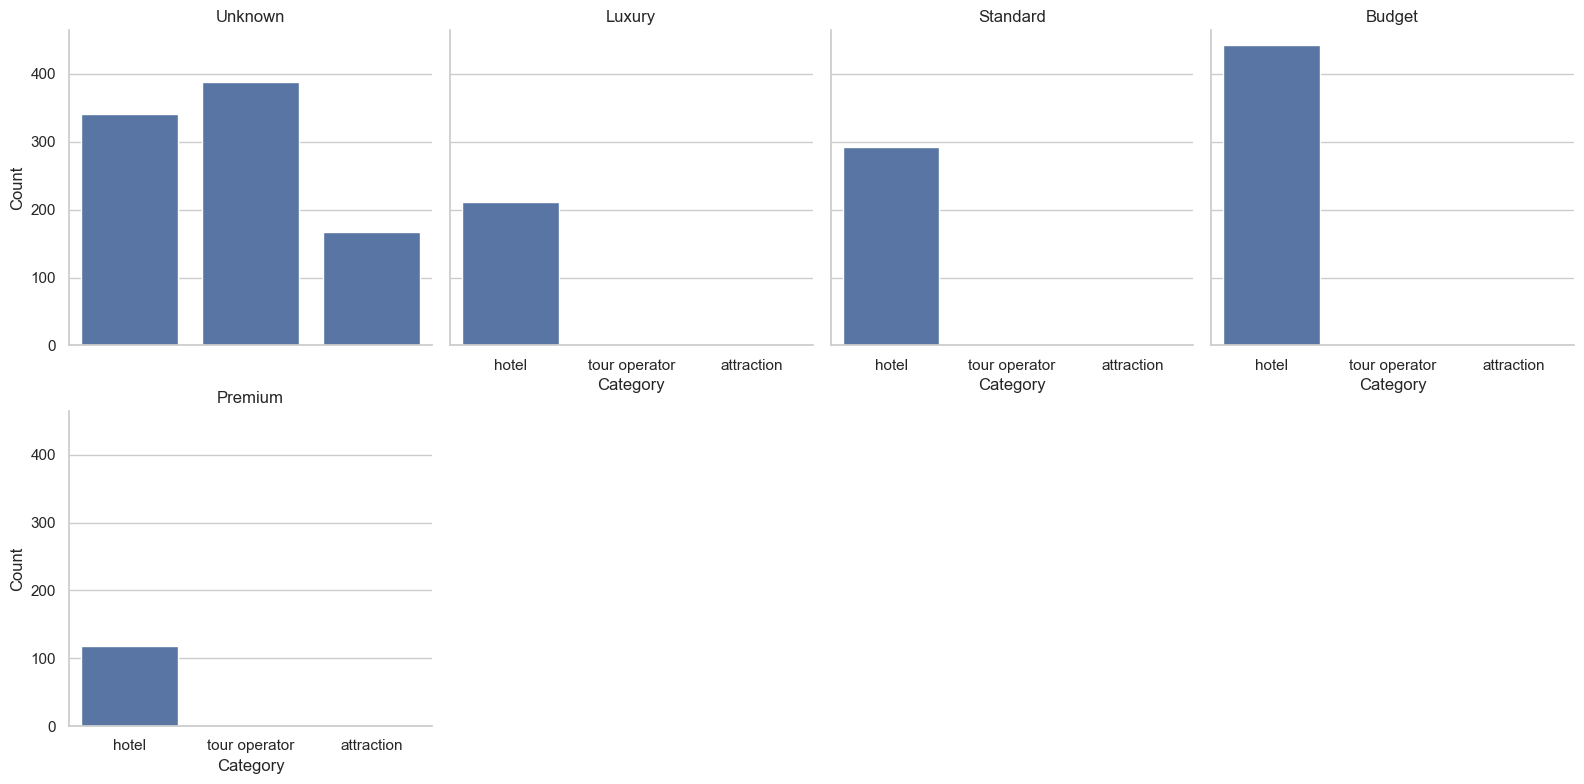

In [52]:
g = sns.FacetGrid(data, col="priceLevel", col_wrap=4, height=4)
g.map(sns.countplot, "category", order=data['category'].value_counts().index)

# Set the titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Category", "Count")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

#### Category Dominance

- **Hotels** are the most prevalent category across all price levels, with a particularly high count in the "**Budget**" segment.
- This suggests a strong preference for budget-friendly hotels.


In [53]:
combined_table = data.groupby(['category', 'priceLevel']).agg(
    avg_rating=('rating', 'mean'),
    total_reviews=('numberOfReviews', 'sum'),
    avg_photo_count=('photoCount', 'mean')
).reset_index()

combined_table

category priceLevel  avg_rating  total_reviews  avg_photo_count
0     attraction    Unknown    4.722892          61325       399.922156
1          hotel     Budget    4.310658          39159        86.015837
2          hotel     Luxury    4.800948          74561       518.521327
3          hotel    Premium    4.483051          53793       553.347458
4          hotel   Standard    4.400344          97126       318.373288
5          hotel    Unknown    4.571848          31126       138.906158
6  tour operator     Budget    4.500000              7         7.000000
7  tour operator     Luxury    5.000000            519       364.500000
8  tour operator    Unknown    4.956186          49462       218.546392

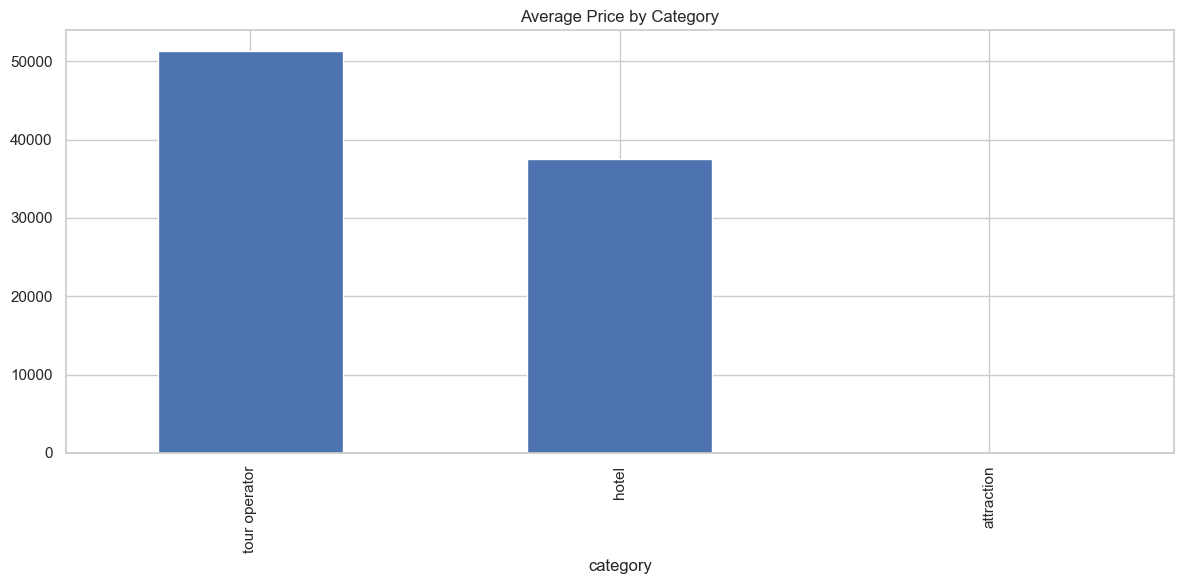

In [54]:
#  Average price range for different categories
data['averagePrice'] = (data['lowerPrice'] + data['upperPrice']) / 2
avg_price_by_category = data.groupby('category')['averagePrice'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_price_by_category.plot(kind='bar')
plt.title('Average Price by Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Summary
The attraction category lacks price data and this presents a challenge. We will handle the issue by creating separate models for each category.

We will build three different recommendation models: one for attractions, tour oprerator and the other for hotels. Since attractions don’t have price data, we will exclude priceLevel from the model for attractions and focus on other features like rating and reviews.

This approach will allow tailoring the recommendation model specifically to the available data for each category.

In [55]:
# data.to_csv('C:/Users/Hp/Documents/DATA_SCIENCE/MORINGA/PHASE_5-Final_Project/SafariHub/data.csv', index=False)

# ***Modeling***

Encode the `location`, `province` and `category` columns so as to fit them into the models.

In [56]:
label_encoder = LabelEncoder()
data['location_encoded'] = label_encoder.fit_transform(data['location'])
data['province_encoded'] = label_encoder.fit_transform(data['province'])
data['category_encoded'] = label_encoder.fit_transform(data['category'])

Split the data into categories so as to work with the different requirements.
This is to avoid dropping rows that don't have price values which would be helpful for the hotel category.

In [57]:
# Filter the rows where the 'category' is 'attraction'
attraction_data = data[data['category'] == 'attraction'][[
    'name', 'category', 'rating', 'numberOfReviews', 'photoCount','category_encoded', 'location',
    'reviewTags', 'priceLevel', 'texts', 'reviews', 'weighted_sentiment', 'adjusted_sentiment',
    'bigram_counts', 'priceLevelencoded', 'location_encoded', 'province_encoded', 'flattened_bigrams'
]]

# Filter the rows where the 'category' is 'hotel'
hotel_data = data[data['category'] == 'hotel'][[
    'name', 'category', 'rating', 'numberOfReviews', 'photoCount','category_encoded',
    'priceRange', 'reviewTags', 'priceLevel', 'texts', 'reviews',
    'lowerPrice', 'upperPrice', 'weighted_sentiment', 'adjusted_sentiment',
    'bigram_counts', 'priceLevelencoded', 'location_encoded', 'province_encoded', 'flattened_bigrams'
]]

# Filter the rows where the 'category' is 'tours'
tours_data = data[data['category'] == 'tour operator'][[
    'name', 'category', 'rating', 'numberOfReviews', 'photoCount','category_encoded', 'main_bigram',
    'reviewTags', 'priceLevel', 'texts', 'reviews', 'weighted_sentiment', 'adjusted_sentiment',
    'bigram_counts', 'priceLevelencoded', 'location_encoded', 'province_encoded', 'flattened_bigrams'
]]

In [58]:
print(attraction_data.shape)
print(hotel_data.shape)
print(tours_data.shape)

(167, 18)
(1404, 20)
(391, 18)


Drop null values

In [59]:
attraction_data = attraction_data.dropna()
attraction_data.reset_index(drop=True, inplace=True)
print(attraction_data.shape)
hotel_data = hotel_data.dropna()
hotel_data.reset_index(drop=True, inplace=True)
print(hotel_data.shape)
tours_data = tours_data.dropna()
tours_data.reset_index(drop=True, inplace=True)
print(tours_data.shape)

(149, 18)
(1061, 20)
(271, 18)


## Attraction predictor

### Model 1 - KNN

In [60]:
# Define similarity condition to be used for classification
attraction_data['similar'] = ((attraction_data['rating'].diff().abs() < 0.5) & 
                              (attraction_data['priceLevelencoded'].diff().abs() == 0))

# Convert the condition to binary labels (1 for similar, 0 for not similar)
attraction_data['similar'] = attraction_data['similar'].astype(int)

names = attraction_data['name']

# Assign the target variable 'y'
y = attraction_data['similar']

# Add 'similar' as a feature to X
X = attraction_data[['category_encoded', 'rating', 'numberOfReviews', 'photoCount', 'adjusted_sentiment',
                     'location_encoded', 'province_encoded', 'priceLevelencoded', 'similar']]

# Vectorization
# Initialize CountVectorizer to vectorize the flattened bigrams
vectorizer = CountVectorizer()
bigram_matrix = vectorizer.fit_transform(attraction_data['flattened_bigrams'])

# Combine this with the bigram matrix as before
combined_features = np.hstack((X, bigram_matrix.toarray()))

# Scale the combined features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, names_train, names_test = train_test_split(X_scaled, y, names, test_size=0.2, random_state=42)

# Initialize and fit the KNN model on training data
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(X_train)

def recommend_attractions(tour_name, top_n=5):
    """
    Recommend attractions similar to a given tour name.
    
    Parameters:
    - tour_name: The name of the tour selected by the user.
    - top_n: The number of similar attractions to recommend.
    
    Returns:
    - recommended_data: DataFrame containing recommended attraction names, ratings, price range, location, and distances.
    """
    # Find the index of the given tour name
    tour_idx = names_train[names_train == tour_name].index[0]
    
    # Find the nearest neighbors in the training set
    distances, indices = knn.kneighbors([X_train[tour_idx]], n_neighbors=top_n+1)  # +1 to include the query itself
    
    # Get the recommended attractions, excluding the query itself
    recommended_names = names_train.iloc[indices.flatten()[1:]].values
    
    # Retrieve the relevant data from attraction_data
    recommended_data = attraction_data[attraction_data['name'].isin(recommended_names)][['name', 'rating', 'location']]
    
    # Add the distances to the DataFrame
    recommended_data['distances'] = distances.flatten()[1:]
    
    return recommended_data

# Test the Recommendation Function
example_tour_name = names_train.iloc[23]
recommended_attractions = recommend_attractions(example_tour_name)



from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

def evaluate_recommendations(knn_model, X_test, y_test, names_test, top_n=5):
    """
    Evaluate the KNN model by predicting the most similar attractions for the test set
    and calculating metrics like RMSE, MAE, Accuracy, Precision, Recall, F1 Score, and Classification Report.
    """
    total_mse, total_mae, count = 0, 0, 0
    all_true_labels = []
    all_pred_labels = []
    
    for idx, test_sample in enumerate(X_test):
        # Get the true similarity label for this test sample
        true_label = y_test.iloc[idx]
        
        # Predict the closest neighbors for the test sample
        distances, indices = knn_model.kneighbors([test_sample], n_neighbors=top_n)
        
        # Check if the true name is in the recommended names
        recommended_names = names_train.iloc[indices.flatten()].values
        pred_labels = [1 if y_train.iloc[indices.flatten()[i]] == 1 else 0 for i in range(top_n)]
        
        # Accumulate metrics
        all_true_labels.append(true_label)
        all_pred_labels.append(pred_labels[0])  # Take the top recommendation as the prediction
        
        # Calculate distance metrics (using the distance as an approximation of similarity)
        mse = np.mean(distances**2)
        mae = np.mean(distances)
        
        total_mse += mse
        total_mae += mae
        count += 1
    
    avg_mse = total_mse / count
    avg_rmse = np.sqrt(avg_mse)
    avg_mae = total_mae / count
    
    print(f"Distance Metrics:\n")
    print(f"Average Mean Squared Error (MSE): {avg_mse}\n")
    print(f"Average Root Mean Squared Error (RMSE): {avg_rmse}\n")
    print(f"Average Mean Absolute Error (MAE): {avg_mae}")
    
    # Calculate classification metrics
    accuracy = accuracy_score(all_true_labels, all_pred_labels)
    precision = precision_score(all_true_labels, all_pred_labels)
    recall = recall_score(all_true_labels, all_pred_labels)
    f1 = f1_score(all_true_labels, all_pred_labels)
    
    # print(f"Accuracy: {accuracy}")
    # print(f"Precision: {precision}")
    # print(f"Recall: {recall}")
    # print(f"F1 Score: {f1}")
    
    # Generate and print the classification report
    report = classification_report(all_true_labels, all_pred_labels, target_names=["Not Similar", "Similar"])
    print("\nClassification Report:\n")
    print(report)

# Run the evaluation
evaluate_recommendations(knn, X_test, y_test, names_test, top_n=5)


print(f"Recommended attractions for {example_tour_name}:")
recommended_attractions


Distance Metrics:

Average Mean Squared Error (MSE): 0.6109949893555826

Average Root Mean Squared Error (RMSE): 0.7816616847176165

Average Mean Absolute Error (MAE): 0.7116204485625998

Classification Report:

              precision    recall  f1-score   support

 Not Similar       0.77      0.71      0.74        14
     Similar       0.76      0.81      0.79        16

    accuracy                           0.77        30
   macro avg       0.77      0.76      0.76        30
weighted avg       0.77      0.77      0.77        30

Recommended attractions for Observation Hill:


name  rating                      location  \
1    Mount Longonot National Park     4.5                    Maai Mahiu   
4       Crescent Island Game Park     4.5                      Naivasha   
20          Nairobi National Park     4.5                       Nairobi   
61          Ol Pejeta Conservancy     4.5               Laikipia County   
119                       ToKenya     5.0  Maasai Mara National Reserve   

     distances  
1     0.906975  
4     0.956978  
20    0.967343  
61    0.967978  
119   0.980840

The `MSE` of `0.610` indicates that the squared differences between predicted and actual ratings are relatively small. The `RMSE` of `0.781` suggests that, on average, our predictions are about 0.781 units away from the actual ratings. `MAE` of `0.711` shows that, on average, our predictions deviate by 0.711 units from the true ratings, indicating overall good model performance.

### Model 2 - Cosine Similarity

In [61]:
# Compute Cosine Similarity
similarity_matrix = cosine_similarity(X_scaled)

# Function to recommend attractions based on cosine similarity
def recommend_attractions(attraction_index, top_n=5):
    """
    Recommend attractions based on cosine similarity.
    
    Parameters:
    - attraction_index: The index of the hotel for which recommendations are being generated.
    - top_n: The number of similar attractions to recommend.
    
    Returns:
    - recommended_data: DataFrame containing recommended attraction names, ratings, locations, and similarity scores.
    - similarity_scores: List of similarity scores corresponding to the recommended attractions.
    """
    similarity_scores = list(enumerate(similarity_matrix[attraction_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:top_n+1]  # Exclude the item itself
    attraction_indices = [i[0] for i in similarity_scores]
    
    # Extract the recommended attractions from the original data
    recommended_data = attraction_data.iloc[attraction_indices].copy()
    
    # Add the similarity scores to the recommended data
    recommended_data['similarity_score'] = [score[1] for score in similarity_scores]
    
    return recommended_data, [score[1] for score in similarity_scores]

# Function to evaluate the cosine similarity-based recommendation model
def evaluate_cosine_recommendations(similarity_matrix, attraction_data, top_n=5):
    """
    Evaluate the cosine similarity-based recommendation model by predicting the most similar attractions
    and calculating metrics like RMSE, MAE, Accuracy, Precision, Recall, F1 Score, and Classification Report.
    """
    total_mse, total_mae, count = 0, 0, 0
    all_true_labels = []
    all_pred_labels = []
    
    for idx in range(len(similarity_matrix)):
        # Get the true label (1 if the hotel is similar, 0 if not)
        true_label = attraction_data['similar'].iloc[idx]
        
        # Get the top N recommended attractions for this hotel
        recommended_attractions, distances = recommend_attractions(idx, top_n=top_n)
        
        # Predict label based on whether the recommended hotel is similar
        pred_labels = [1 if hotel['similar'] == 1 else 0 for _, hotel in recommended_attractions.iterrows()]
        
        # Accumulate metrics
        all_true_labels.append(true_label)
        all_pred_labels.append(pred_labels[0])  # Take the top recommendation as the prediction
        
        # Calculate distance metrics (using the distance as an approximation of similarity)
        mse = np.mean(np.array(distances)**2)
        mae = np.mean(np.array(distances))
        
        total_mse += mse
        total_mae += mae
        count += 1
    
    avg_mse = total_mse / count
    avg_rmse = np.sqrt(avg_mse)
    avg_mae = total_mae / count
    
    print(f"Distance Metrics:\n")
    print(f"Average Mean Squared Error (MSE): {avg_mse}\n")
    print(f"Average Root Mean Squared Error (RMSE): {avg_rmse}\n")
    print(f"Average Mean Absolute Error (MAE): {avg_mae}")
    
    # Calculate classification metrics
    accuracy = accuracy_score(all_true_labels, all_pred_labels)
    precision = precision_score(all_true_labels, all_pred_labels)
    recall = recall_score(all_true_labels, all_pred_labels)
    f1 = f1_score(all_true_labels, all_pred_labels)
    
    # print(f"\nClassification Metrics:\n")
    # print(f"Accuracy: {accuracy}")
    # print(f"Precision: {precision}")
    # print(f"Recall: {recall}")
    # print(f"F1 Score: {f1}")
    
    # Generate and print the classification report
    report = classification_report(all_true_labels, all_pred_labels, target_names=["Not Similar", "Similar"])
    print("\nClassification Report:\n")
    print(report)

# Evaluate the cosine similarity-based recommendations
evaluate_cosine_recommendations(similarity_matrix, attraction_data, top_n=5)

# Get recommendations for a specific attraction
attraction_index = 0  # Example index
attraction_name = attraction_data['name'].iloc[attraction_index]
recommended_attractions, similarity_scores = recommend_attractions(attraction_index, top_n=5)

print(f"Recommended attractions for {attraction_name}:")
recommended_attractions[['name', 'rating', 'location', 'similarity_score']]


Distance Metrics:

Average Mean Squared Error (MSE): 0.2101912092719672

Average Root Mean Squared Error (RMSE): 0.4584661484471533

Average Mean Absolute Error (MAE): 0.30222058055329665

Classification Report:

              precision    recall  f1-score   support

 Not Similar       0.68      0.63      0.66        65
     Similar       0.73      0.77      0.75        84

    accuracy                           0.71       149
   macro avg       0.71      0.70      0.70       149
weighted avg       0.71      0.71      0.71       149

Recommended attractions for Observation Hill:


name  rating  \
51  Kenyatta International Conference Center     4.0   
59                          Modan Rent A Car     5.0   
37                             Bamburi Beach     4.0   
3                          Fort Jesus Museum     4.0   
17                                Mara River     4.5   

                        location  similarity_score  
51                       Nairobi          0.095334  
59                       Nairobi          0.081434  
37                       Mombasa          0.062403  
3                        Mombasa          0.056764  
17  Maasai Mara National Reserve          0.043010

### Model 3 - SVM

In [62]:
# Define similarity condition
# Hotels are similar if they have a rating difference of less than 0.5 and are within the same price level
attraction_data['similar'] = ((attraction_data['rating'].diff().abs() < 0.5) & 
                         (attraction_data['priceLevelencoded'].diff().abs() == 0))

# Convert the condition to binary labels (1 for similar, 0 for not similar)
attraction_data['similar'] = attraction_data['similar'].astype(int)

# Assign the target variable 'y'
y = attraction_data['similar']

# Select the features and the target labels
X = attraction_data[['category_encoded', 'rating', 'numberOfReviews', 'photoCount', 'adjusted_sentiment',
           'location_encoded', 'province_encoded', 'priceLevelencoded']]

# Extract the 'name' column
names = attraction_data['name']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the SVM model on training data
svm_model = SVC(kernel='linear')  # You can use other kernels like 'rbf' if needed
svm_model.fit(X_train, y_train)

def recommend_attractions(tour_name, top_n=5):
    """
    Recommend attractions similar to a given tour name based on SVM classification.
    
    Parameters:
    - tour_name: The name of the tour selected by the user.
    - top_n: The number of similar attractions to recommend.
    
    Returns:
    - recommended_attractions: DataFrame of recommended attraction names, ratings, and locations.
    """
    # Find the index of the given tour name
    attraction_idx = names[names == tour_name].index[0]
    
    # Predict similarities for all tours
    predictions = svm_model.decision_function(X_scaled)
    
    # Sort the indices by the decision function values (the larger, the more similar)
    similar_indices = np.argsort(predictions)[::-1]
    
    # Get the recommended attractions, excluding the query itself
    recommended_attractions = attraction_data.iloc[similar_indices[1:top_n+1]][['name', 'rating', 'location']]
    return recommended_attractions


# Evaluate the SVM model
def evaluate_svm(svm_model, X_test, y_test):
    """
    Evaluate the SVM model by predicting the labels for the test set
    and printing classification metrics.
    """
    y_pred = svm_model.predict(X_test)
    
    # Print classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

# Run the evaluation
evaluate_svm(svm_model, X_test, y_test)

# Test the Recommendation Function
example_name = names.iloc[20]  # Just taking the first attraction as an example
recommended_attractions = recommend_attractions(example_name)
print(f"\nAttractions similar to {example_name}:")
recommended_attractions



Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.36      0.42        14
           1       0.55      0.69      0.61        16

    accuracy                           0.53        30
   macro avg       0.53      0.52      0.51        30
weighted avg       0.53      0.53      0.52        30


Attractions similar to Nairobi National Park:


name  rating location
16                        Giraffe Centre     4.5  Nairobi
76  Nai Nami - Our Streets. Our Stories.     5.0  Nairobi
58                        Explorer Kenya     5.0  Nairobi
78                       Spirit of Kenya     5.0  Nairobi
70            Revitalize Wellness Center     5.0  Nairobi

***Observation***

- Both KNN & Cosine Similarity models have their strengths and weaknesses. The KNN model seems to perform better in terms of precision, while the cosine similarity model has a lower RMSE.
- SVM performed worse in all aspects.

## Hotel predictor

### Model 1 - KNN

In [63]:
# Define similarity condition to be used for classification
hotel_data['similar'] = ((hotel_data['rating'].diff().abs() < 0.5) & 
                              (hotel_data['priceLevelencoded'].diff().abs() == 0))

# Convert the condition to binary labels (1 for similar, 0 for not similar)
hotel_data['similar'] = hotel_data['similar'].astype(int)

names = hotel_data['name']

# Assign the target variable 'y'
y = hotel_data['similar']

# Add 'similar' as a feature to X
X = hotel_data[['category_encoded', 'rating', 'numberOfReviews', 'photoCount', 'adjusted_sentiment',
                     'location_encoded', 'province_encoded', 'priceLevelencoded', 'similar',
                     'upperPrice', 'lowerPrice']]

# Vectorization
# Initialize CountVectorizer to vectorize the flattened bigrams
vectorizer = CountVectorizer()
bigram_matrix = vectorizer.fit_transform(hotel_data['flattened_bigrams'])

# Combine this with the bigram matrix as before
combined_features = np.hstack((X, bigram_matrix.toarray()))

# Scale the combined features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, names_train, names_test = train_test_split(X_scaled, y, names, test_size=0.2, random_state=42)

# Initialize and fit the KNN model on training data
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(X_train)

def recommend_hotels(hotel_name, top_n=5):
    """
    Recommend hotels similar to a given hotel name.
    
    Parameters:
    - hotel_name: The name of the hotel selected by the user.
    - top_n: The number of similar hotels to recommend.
    
    Returns:
    - recommended_data: DataFrame containing recommended hotel names, ratings, price range, location, and distances.
    """
    # Find the index of the given hotel name
    hotel_idx = names_train[names_train == hotel_name].index[0]
    
    # Find the nearest neighbors in the training set
    distances, indices = knn.kneighbors([X_train[hotel_idx]], n_neighbors=top_n+1)  # +1 to include the query itself
    
    # Get the recommended hotels, excluding the query itself
    recommended_names = names_train.iloc[indices.flatten()[1:]].values
    
    # Retrieve the relevant data from hotel_data
    recommended_data = hotel_data[hotel_data['name'].isin(recommended_names)][['name', 'rating', 'priceRange', 'priceLevel']]
    
    # Add the distances to the DataFrame
    recommended_data['distances'] = distances.flatten()[1:]
    
    return recommended_data

# Test the Recommendation Function
example_hotel_name = names_train.iloc[87]
recommended_hotels = recommend_hotels(example_hotel_name)



from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

def evaluate_recommendations(knn_model, X_test, y_test, names_test, top_n=5):
    """
    Evaluate the KNN model by predicting the most similar hotels for the test set
    and calculating metrics like RMSE, MAE, Accuracy, Precision, Recall, F1 Score, and Classification Report.
    """
    total_mse, total_mae, count = 0, 0, 0
    all_true_labels = []
    all_pred_labels = []
    
    for idx, test_sample in enumerate(X_test):
        # Get the true similarity label for this test sample
        true_label = y_test.iloc[idx]
        
        # Predict the closest neighbors for the test sample
        distances, indices = knn_model.kneighbors([test_sample], n_neighbors=top_n)
        
        # Check if the true name is in the recommended names
        recommended_names = names_train.iloc[indices.flatten()].values
        pred_labels = [1 if y_train.iloc[indices.flatten()[i]] == 1 else 0 for i in range(top_n)]
        
        # Accumulate metrics
        all_true_labels.append(true_label)
        all_pred_labels.append(pred_labels[0])  # Take the top recommendation as the prediction
        
        # Calculate distance metrics (using the distance as an approximation of similarity)
        mse = np.mean(distances**2)
        mae = np.mean(distances)
        
        total_mse += mse
        total_mae += mae
        count += 1
    
    avg_mse = total_mse / count
    avg_rmse = np.sqrt(avg_mse)
    avg_mae = total_mae / count
    
    print(f"Distance Metrics:\n")
    print(f"Average Mean Squared Error (MSE): {avg_mse}\n")
    print(f"Average Root Mean Squared Error (RMSE): {avg_rmse}\n")
    print(f"Average Mean Absolute Error (MAE): {avg_mae}")
    
    # Calculate classification metrics
    accuracy = accuracy_score(all_true_labels, all_pred_labels)
    precision = precision_score(all_true_labels, all_pred_labels)
    recall = recall_score(all_true_labels, all_pred_labels)
    f1 = f1_score(all_true_labels, all_pred_labels)
    
    # print(f"Accuracy: {accuracy}")
    # print(f"Precision: {precision}")
    # print(f"Recall: {recall}")
    # print(f"F1 Score: {f1}")
    
    # Generate and print the classification report
    report = classification_report(all_true_labels, all_pred_labels, target_names=["Not Similar", "Similar"])
    print("\nClassification Report:\n")
    print(report)

# Run the evaluation
evaluate_recommendations(knn, X_test, y_test, names_test, top_n=5)


print(f"Recommended hotels for {example_hotel_name}:")
recommended_hotels


Distance Metrics:

Average Mean Squared Error (MSE): 0.33096395686193425

Average Root Mean Squared Error (RMSE): 0.5752946695928394

Average Mean Absolute Error (MAE): 0.41681208879029197

Classification Report:

              precision    recall  f1-score   support

 Not Similar       0.93      0.94      0.93       182
     Similar       0.62      0.58      0.60        31

    accuracy                           0.89       213
   macro avg       0.78      0.76      0.77       213
weighted avg       0.88      0.89      0.89       213

Recommended hotels for Diani Sea Lodge:


name  rating               priceRange  \
28   Jacaranda Indian Ocean Beach Resort     4.0  KES 13,080 - KES 23,207   
72                          Medina Palms     4.5  KES 30,802 - KES 42,897   
103             Sandies Tropical Village     4.0  KES 16,596 - KES 25,598   
227           Silver Palm Spa and Resort     4.5  KES 25,176 - KES 30,942   
248             The Charming Lonno Lodge     5.0  KES 42,335 - KES 47,257   

    priceLevel  distances  
28    Standard   0.800187  
72     Premium   0.868753  
103   Standard   0.886675  
227   Standard   0.891293  
248     Luxury   0.897824

### Model 2 - Cosine Similarity

In [64]:
# Compute Cosine Similarity
similarity_matrix = cosine_similarity(X_scaled)

# Function to recommend hotels based on cosine similarity
def recommend_hotels(hotel_index, top_n=5):
    """
    Recommend hotels based on cosine similarity.
    
    Parameters:
    - hotel_index: The index of the hotel for which recommendations are being generated.
    - top_n: The number of similar hotels to recommend.
    
    Returns:
    - recommended_data: DataFrame containing recommended hotel names, ratings, locations, and similarity scores.
    - similarity_scores: List of similarity scores corresponding to the recommended hotels.
    """
    similarity_scores = list(enumerate(similarity_matrix[hotel_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:top_n+1]  # Exclude the item itself
    hotel_indices = [i[0] for i in similarity_scores]
    
    # Extract the recommended hotels from the original data
    recommended_data = hotel_data.iloc[hotel_indices].copy()
    
    # Add the similarity scores to the recommended data
    recommended_data['similarity_score'] = [score[1] for score in similarity_scores]
    
    return recommended_data, [score[1] for score in similarity_scores]

# Function to evaluate the cosine similarity-based recommendation model
def evaluate_cosine_recommendations(similarity_matrix, hotel_data, top_n=5):
    """
    Evaluate the cosine similarity-based recommendation model by predicting the most similar hotels
    and calculating metrics like RMSE, MAE, Accuracy, Precision, Recall, F1 Score, and Classification Report.
    """
    total_mse, total_mae, count = 0, 0, 0
    all_true_labels = []
    all_pred_labels = []
    
    for idx in range(len(similarity_matrix)):
        # Get the true label (1 if the hotel is similar, 0 if not)
        true_label = hotel_data['similar'].iloc[idx]
        
        # Get the top N recommended hotels for this hotel
        recommended_hotels, distances = recommend_hotels(idx, top_n=top_n)
        
        # Predict label based on whether the recommended hotel is similar
        pred_labels = [1 if hotel['similar'] == 1 else 0 for _, hotel in recommended_hotels.iterrows()]
        
        # Accumulate metrics
        all_true_labels.append(true_label)
        all_pred_labels.append(pred_labels[0])  # Take the top recommendation as the prediction
        
        # Calculate distance metrics (using the distance as an approximation of similarity)
        mse = np.mean(np.array(distances)**2)
        mae = np.mean(np.array(distances))
        
        total_mse += mse
        total_mae += mae
        count += 1
    
    avg_mse = total_mse / count
    avg_rmse = np.sqrt(avg_mse)
    avg_mae = total_mae / count
    
    print(f"Distance Metrics:\n")
    print(f"Average Mean Squared Error (MSE): {avg_mse}\n")
    print(f"Average Root Mean Squared Error (RMSE): {avg_rmse}\n")
    print(f"Average Mean Absolute Error (MAE): {avg_mae}")
    
    # Calculate classification metrics
    accuracy = accuracy_score(all_true_labels, all_pred_labels)
    precision = precision_score(all_true_labels, all_pred_labels)
    recall = recall_score(all_true_labels, all_pred_labels)
    f1 = f1_score(all_true_labels, all_pred_labels)
    
    # print(f"\nClassification Metrics:\n")
    # print(f"Accuracy: {accuracy}")
    # print(f"Precision: {precision}")
    # print(f"Recall: {recall}")
    # print(f"F1 Score: {f1}")
    
    # Generate and print the classification report
    report = classification_report(all_true_labels, all_pred_labels, target_names=["Not Similar", "Similar"])
    print("\nClassification Report:\n")
    print(report)

# Evaluate the cosine similarity-based recommendations
evaluate_cosine_recommendations(similarity_matrix, hotel_data, top_n=5)

# Get recommendations for a specific hotel
hotel_index = 71  # Example index
hotel_name = hotel_data['name'].iloc[hotel_index]
recommended_hotels, similarity_scores = recommend_hotels(hotel_index, top_n=5)

print(f"Recommended hotels for {hotel_name}:")
recommended_hotels[['name', 'rating', 'priceRange', 'priceLevel', 'similarity_score']]


Distance Metrics:

Average Mean Squared Error (MSE): 0.5157104187327229

Average Root Mean Squared Error (RMSE): 0.7181298063252374

Average Mean Absolute Error (MAE): 0.60350758671227

Classification Report:

              precision    recall  f1-score   support

 Not Similar       0.94      0.94      0.94       918
     Similar       0.61      0.58      0.59       143

    accuracy                           0.89      1061
   macro avg       0.77      0.76      0.77      1061
weighted avg       0.89      0.89      0.89      1061

Recommended hotels for Diani Sea Lodge:


name  rating               priceRange  \
280             Mnarani Beach Club     4.5  KES 12,658 - KES 15,471   
38                Diani Sea Resort     4.5  KES 24,754 - KES 36,990   
410        Mimosa Court Apartments     4.0  KES 14,627 - KES 17,300   
323    Pinewood Beach Resort & Spa     4.5  KES 25,738 - KES 37,412   
815  Pinewood Beach Resort and Spa     4.5  KES 25,305 - KES 36,854   

    priceLevel  similarity_score  
280     Budget          0.170065  
38     Premium          0.121812  
410   Standard          0.121676  
323    Premium          0.094455  
815    Premium          0.092906

### Model 3 - SVM

In [65]:
# Define similarity condition
# Hotels are similar if they have a rating difference of less than 0.5 and are within the same price level
hotel_data['similar'] = ((hotel_data['rating'].diff().abs() < 0.5) & 
                         (hotel_data['priceLevelencoded'].diff().abs() == 0))

# Convert the condition to binary labels (1 for similar, 0 for not similar)
hotel_data['similar'] = hotel_data['similar'].astype(int)

# Assign the target variable 'y'
y = hotel_data['similar']

# Select the features and the target labels
X = hotel_data[['category_encoded', 'rating', 'numberOfReviews', 'photoCount', 'adjusted_sentiment',
           'location_encoded', 'province_encoded', 'lowerPrice', 'upperPrice', 'priceLevelencoded']]

# Extract the 'name' column
names = hotel_data['name']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the SVM model on training data
svm_model = SVC(kernel='linear')  # You can use other kernels like 'rbf' if needed
svm_model.fit(X_train, y_train)

def recommend_hotels(tour_name, top_n=5):
    """
    Recommend attractions similar to a given tour name based on SVM classification.
    
    Parameters:
    - tour_name: The name of the tour selected by the user.
    - top_n: The number of similar attractions to recommend.
    
    Returns:
    - recommended_names: List of recommended attraction names.
    """
    # Find the index of the given tour name
    tour_idx = names[names == tour_name].index[0]
    
    # Predict similarities for all tours
    predictions = svm_model.decision_function(X_scaled)
    
    # Sort the indices by the decision function values (the larger, the more similar)
    similar_indices = np.argsort(predictions)[::-1]
    
    # Get the recommended attractions, excluding the query itself
    recommended_names = names.iloc[similar_indices[1:top_n+1]].values
    return recommended_names

# Test the Recommendation Function
example_tour_name = names.iloc[65]  # Just taking the first tour as an example
recommended_names = recommend_hotels(example_tour_name)
print("Recommended attractions:", recommended_names)

# Evaluate the SVM model
def evaluate_svm(svm_model, X_test, y_test):
    """
    Evaluate the SVM model by predicting the labels for the test set
    and printing classification metrics.
    """
    y_pred = svm_model.predict(X_test)
    
    # Print classification report
    print(classification_report(y_test, y_pred))

# Run the evaluation
evaluate_svm(svm_model, X_test, y_test)


Recommended attractions: ['PrideInn Paradise Beach Resort & Spa Mombasa'
 'PrideInn Paradise Beach Resort & Spa' 'Hilton Nairobi'
 'Eka Hotel Nairobi' '2.5.4 Ole-Sereni Hotel']
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       182
           1       0.00      0.00      0.00        31

    accuracy                           0.85       213
   macro avg       0.43      0.50      0.46       213
weighted avg       0.73      0.85      0.79       213



***Observation***

- The SVM model is performing well in predicting "Not Similar" attractions but is failing to identify "Similar" ones.

- The KNN model exhibits lower error metrics (MSE, RMSE, MAE) compared to the Cosine Similarity model. This suggests that the KNN model is better at minimizing errors when predicting similarity between hotels.

- Both models show similar performance in terms of classification, particularly for the "Similar" class. However, the KNN model slightly outperforms in F1-score for the "Similar" class, making it more reliable in identifying similar hotels.

- The recommendations provided by the KNN model seem more varied in price level and are closer in terms of distance (e.g., distances range between 0.800 and 0.898).

- The recommendations by the Cosine Similarity model seem to favor hotels with slightly different price levels and generally lower similarity scores. The distance metrics are not as consistent.

- The KNN model offers recommendations that are more consistent in terms of proximity to the target hotel, which is an essential factor in making relevant recommendations.

> The KNN model appears to be the more suitable option for recommending hotels.

## Tour Operator predictor

### Model 1 - KNN

In [66]:
# Define similarity condition to be used for classification
tours_data['similar'] = ((tours_data['rating'].diff().abs() < 0.5) & 
                              (tours_data['priceLevelencoded'].diff().abs() == 0))

# Convert the condition to binary labels (1 for similar, 0 for not similar)
tours_data['similar'] = tours_data['similar'].astype(int)

names = tours_data['name']

# Assign the target variable 'y'
y = tours_data['similar']

# Add 'similar' as a feature to X
X = tours_data[['category_encoded', 'rating', 'numberOfReviews', 'photoCount', 'adjusted_sentiment',
                     'location_encoded', 'province_encoded', 'priceLevelencoded', 'similar']]

# Vectorization
# Initialize CountVectorizer to vectorize the flattened bigrams
vectorizer = CountVectorizer()
bigram_matrix = vectorizer.fit_transform(tours_data['flattened_bigrams'])

# Combine this with the bigram matrix as before
combined_features = np.hstack((X, bigram_matrix.toarray()))

# Scale the combined features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, names_train, names_test = train_test_split(X_scaled, y, names, test_size=0.2, random_state=42)

# Initialize and fit the KNN model on training data
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(X_train)

def recommend_tour_operators(tour_name, top_n=5):
    """
    Recommend tour_operators similar to a given tour name.
    
    Parameters:
    - tour_name: The name of the tour selected by the user.
    - top_n: The number of similar tour_operators to recommend.
    
    Returns:
    - recommended_data: DataFrame containing recommended tour operator names, ratings, price range, location, and distances.
    """
    # Find the index of the given tour name
    operator_idx = names_train[names_train == tour_name].index[0]
    
    # Find the nearest neighbors in the training set
    distances, indices = knn.kneighbors([X_train[operator_idx]], n_neighbors=top_n+1)  # +1 to include the query itself
    
    # Get the recommended tour_operators, excluding the query itself
    recommended_names = names_train.iloc[indices.flatten()[1:]].values
    
    # Retrieve the relevant data from tours_data
    recommended_data = tours_data[tours_data['name'].isin(recommended_names)][['name', 'rating', 'numberOfReviews', 'main_bigram']]
    
    # Add the distances to the DataFrame
    recommended_data['distances'] = distances.flatten()[1:]
    
    return recommended_data

# Test the Recommendation Function
example_tour_operator_name = names_train.iloc[0]
recommended_tour_operators = recommend_tour_operators(example_tour_operator_name)



def evaluate_recommendations(knn_model, X_test, y_test, names_test, top_n=5):
    """
    Evaluate the KNN model by predicting the most similar tour_operators for the test set
    and calculating metrics like RMSE, MAE, Accuracy, Precision, Recall, F1 Score, and Classification Report.
    """
    total_mse, total_mae, count = 0, 0, 0
    all_true_labels = []
    all_pred_labels = []
    
    for idx, test_sample in enumerate(X_test):
        # Get the true similarity label for this test sample
        true_label = y_test.iloc[idx]
        
        # Predict the closest neighbors for the test sample
        distances, indices = knn_model.kneighbors([test_sample], n_neighbors=top_n)
        
        # Check if the true name is in the recommended names
        recommended_names = names_train.iloc[indices.flatten()].values
        pred_labels = [1 if y_train.iloc[indices.flatten()[i]] == 1 else 0 for i in range(top_n)]
        
        # Accumulate metrics
        all_true_labels.append(true_label)
        all_pred_labels.append(pred_labels[0])  # Take the top recommendation as the prediction
        
        # Calculate distance metrics (using the distance as an approximation of similarity)
        mse = np.mean(distances**2)
        mae = np.mean(distances)
        
        total_mse += mse
        total_mae += mae
        count += 1
    
    avg_mse = total_mse / count
    avg_rmse = np.sqrt(avg_mse)
    avg_mae = total_mae / count
    
    print(f"Distance Metrics:\n")
    print(f"Average Mean Squared Error (MSE): {avg_mse}\n")
    print(f"Average Root Mean Squared Error (RMSE): {avg_rmse}\n")
    print(f"Average Mean Absolute Error (MAE): {avg_mae}")
    
    # Calculate classification metrics
    accuracy = accuracy_score(all_true_labels, all_pred_labels)
    precision = precision_score(all_true_labels, all_pred_labels)
    recall = recall_score(all_true_labels, all_pred_labels)
    f1 = f1_score(all_true_labels, all_pred_labels)
    
    # print(f"Accuracy: {accuracy}")
    # print(f"Precision: {precision}")
    # print(f"Recall: {recall}")
    # print(f"F1 Score: {f1}")
    
    # Generate and print the classification report
    report = classification_report(all_true_labels, all_pred_labels, target_names=["Not Similar", "Similar"])
    print("\nClassification Report:\n")
    print(report)

# Run the evaluation
evaluate_recommendations(knn, X_test, y_test, names_test, top_n=5)


print(f"Recommended tour_operators for {example_tour_operator_name}:")
recommended_tour_operators


Distance Metrics:

Average Mean Squared Error (MSE): 0.5387065845649887

Average Root Mean Squared Error (RMSE): 0.7339663374876185

Average Mean Absolute Error (MAE): 0.6597948521034862

Classification Report:

              precision    recall  f1-score   support

 Not Similar       0.86      0.50      0.63        12
     Similar       0.88      0.98      0.92        43

    accuracy                           0.87        55
   macro avg       0.87      0.74      0.78        55
weighted avg       0.87      0.87      0.86        55

Recommended tour_operators for African Home Adventure Safaris:


name  rating  numberOfReviews  \
72                          KT & Safaris     5.0              112   
103        Siri Ya Kenya Tours & Safaris     5.0               97   
191            Epic Views Tours & Travel     5.0               29   
197  Blue Mountain Trekking and Safari's     5.0               24   
228            Tropical Wild Expeditions     5.0               30   

        main_bigram  distances  
72    (tsavo, east)   0.194821  
103  (asante, sana)   0.210830  
191   (masai, mara)   0.223929  
197   (masai, mara)   0.223941  
228   (masai, mara)   0.224025

### Model 2 - Cosine Similarity

In [67]:
# Compute Cosine Similarity
similarity_matrix = cosine_similarity(X_scaled)

# Function to recommend hotels based on cosine similarity
def recommend_tour_operators(operator_index, top_n=5):
    """
    Recommend hotels based on cosine similarity.
    
    Parameters:
    - operator_index: The index of the hotel for which recommendations are being generated.
    - top_n: The number of similar hotels to recommend.
    
    Returns:
    - recommended_data: DataFrame containing recommended hotel names, ratings, locations, and similarity scores.
    - similarity_scores: List of similarity scores corresponding to the recommended hotels.
    """
    similarity_scores = list(enumerate(similarity_matrix[operator_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:top_n+1]  # Exclude the item itself
    operator_indices = [i[0] for i in similarity_scores]
    
    # Extract the recommended hotels from the original data
    recommended_data = tours_data.iloc[operator_indices].copy()
    
    # Add the similarity scores to the recommended data
    recommended_data['similarity_score'] = [score[1] for score in similarity_scores]
    
    return recommended_data, [score[1] for score in similarity_scores]

# Function to evaluate the cosine similarity-based recommendation model
def evaluate_cosine_recommendations(similarity_matrix, tours_data, top_n=5):
    """
    Evaluate the cosine similarity-based recommendation model by predicting the most similar hotels
    and calculating metrics like RMSE, MAE, Accuracy, Precision, Recall, F1 Score, and Classification Report.
    """
    total_mse, total_mae, count = 0, 0, 0
    all_true_labels = []
    all_pred_labels = []
    
    for idx in range(len(similarity_matrix)):
        # Get the true label (1 if the hotel is similar, 0 if not)
        true_label = tours_data['similar'].iloc[idx]
        
        # Get the top N recommended hotels for this hotel
        recommended_tour_operators, distances = recommend_tour_operators(idx, top_n=top_n)
        
        # Predict label based on whether the recommended hotel is similar
        pred_labels = [1 if hotel['similar'] == 1 else 0 for _, hotel in recommended_tour_operators.iterrows()]
        
        # Accumulate metrics
        all_true_labels.append(true_label)
        all_pred_labels.append(pred_labels[0])  # Take the top recommendation as the prediction
        
        # Calculate distance metrics (using the distance as an approximation of similarity)
        mse = np.mean(np.array(distances)**2)
        mae = np.mean(np.array(distances))
        
        total_mse += mse
        total_mae += mae
        count += 1
    
    avg_mse = total_mse / count
    avg_rmse = np.sqrt(avg_mse)
    avg_mae = total_mae / count
    
    print(f"Distance Metrics:\n")
    print(f"Average Mean Squared Error (MSE): {avg_mse}\n")
    print(f"Average Root Mean Squared Error (RMSE): {avg_rmse}\n")
    print(f"Average Mean Absolute Error (MAE): {avg_mae}")
    
    # Calculate classification metrics
    accuracy = accuracy_score(all_true_labels, all_pred_labels)
    precision = precision_score(all_true_labels, all_pred_labels)
    recall = recall_score(all_true_labels, all_pred_labels)
    f1 = f1_score(all_true_labels, all_pred_labels)
    
    # print(f"\nClassification Metrics:\n")
    # print(f"Accuracy: {accuracy}")
    # print(f"Precision: {precision}")
    # print(f"Recall: {recall}")
    # print(f"F1 Score: {f1}")
    
    # Generate and print the classification report
    report = classification_report(all_true_labels, all_pred_labels, target_names=["Not Similar", "Similar"])
    print("\nClassification Report:\n")
    print(report)

# Evaluate the cosine similarity-based recommendations
evaluate_cosine_recommendations(similarity_matrix, tours_data, top_n=5)

# Get recommendations for a specific hotel
operator_index = 33  # Example index
tour_operator_name = tours_data['name'].iloc[operator_index]
recommended_tour_operators, similarity_scores = recommend_tour_operators(operator_index, top_n=5)

print(f"Recommended hotels for {tour_operator_name}:")
recommended_tour_operators[['name', 'rating', 'numberOfReviews', 'main_bigram', 'similarity_score']]


Distance Metrics:

Average Mean Squared Error (MSE): 0.23375976471953955

Average Root Mean Squared Error (RMSE): 0.48348708847242194

Average Mean Absolute Error (MAE): 0.36350386055397826

Classification Report:

              precision    recall  f1-score   support

 Not Similar       0.49      0.43      0.46        46
     Similar       0.89      0.91      0.90       225

    accuracy                           0.83       271
   macro avg       0.69      0.67      0.68       271
weighted avg       0.82      0.83      0.82       271

Recommended hotels for African Home Adventure Safaris:


name  rating  numberOfReviews  \
111                   Tanke Tours & Safaris     5.0              131   
12                   Flexivel Kenya Safaris     5.0              829   
206  Pride of Africa Adventures and Safaris     4.5               65   
261                      Wildebeest Safaris     4.5              111   
245               Explorers Wild Adventures     4.5               68   

         main_bigram  similarity_score  
111    (masai, mara)          0.184459  
12   (driver, guide)          0.062228  
206    (masai, mara)          0.059805  
261   (lake, nakuru)          0.056072  
245   (maasai, mara)          0.052910

***Observation***

- The KNN model is likely the better choice for recommending "Similar" tour operators, despite some weaknesses in distinguishing "Not Similar" ones.

- The Cosine Similarity model could be preferred if minimizing prediction errors (MSE, RMSE, MAE) is more critical, but its classification performance, particularly for the "Not Similar" class, is less robust.

> Given the project's requirements, accuracy and balanced performance across both classes are more important, thus the KNN model seems more suitable.